<a href="https://colab.research.google.com/github/pedrobslima/proj-respAI/blob/main/respAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

min 8 features úteis (o menor num dentre os datasets utilizados em aula, diabetes)

### Especificações

1. Escolha uma base de dados do seu interesse e construa modelos preditivos.

2. Trabalhe agora com os dois aspectos principais explorados em sala:

  - (a) Interpretabilidade: discuta o que o modelo aprendeu, como ele realiza suas predições, quais as variáveis mais importantes,... dentre outros aspectos que ajude a entender o comportamento do modelo enquanto realiza suas predições.   

  - (b) Confiabilidade: qual o desempenho preditivo do modelo, em que situações ele falha, em que situações tem o seu melhor desempenho,... dentre outros pontos que ajude a entender quando confiar as predições do modelo.

- Obs. 1: utilize uma base de dados nova, não usada nas aulas;

- Obs. 2: a entrega será feita com:

  - (a) um notebook comentado com os insights obtidos pela equipe. Mais que gerar gráficos e estatísticas, é importante que se analise os resultados obtidos e que se apontem as conclusões mais importantes.

  - (b) um pequeno vídeo até 10 minutos descrevendo o que foi produzido no notebook.

### Dicionário dataset
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Bytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
---
* price_range: The target variable with value:
  * 0: low cost
  * 1: medium cost
  * 2: high cost
  * 3: very high cost

### Imports

In [163]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay as pdp
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from random import randint
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### dataset (df)

In [2]:
df = pd.read_csv("/content/mobile_price.csv")

In [3]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

<Axes: >

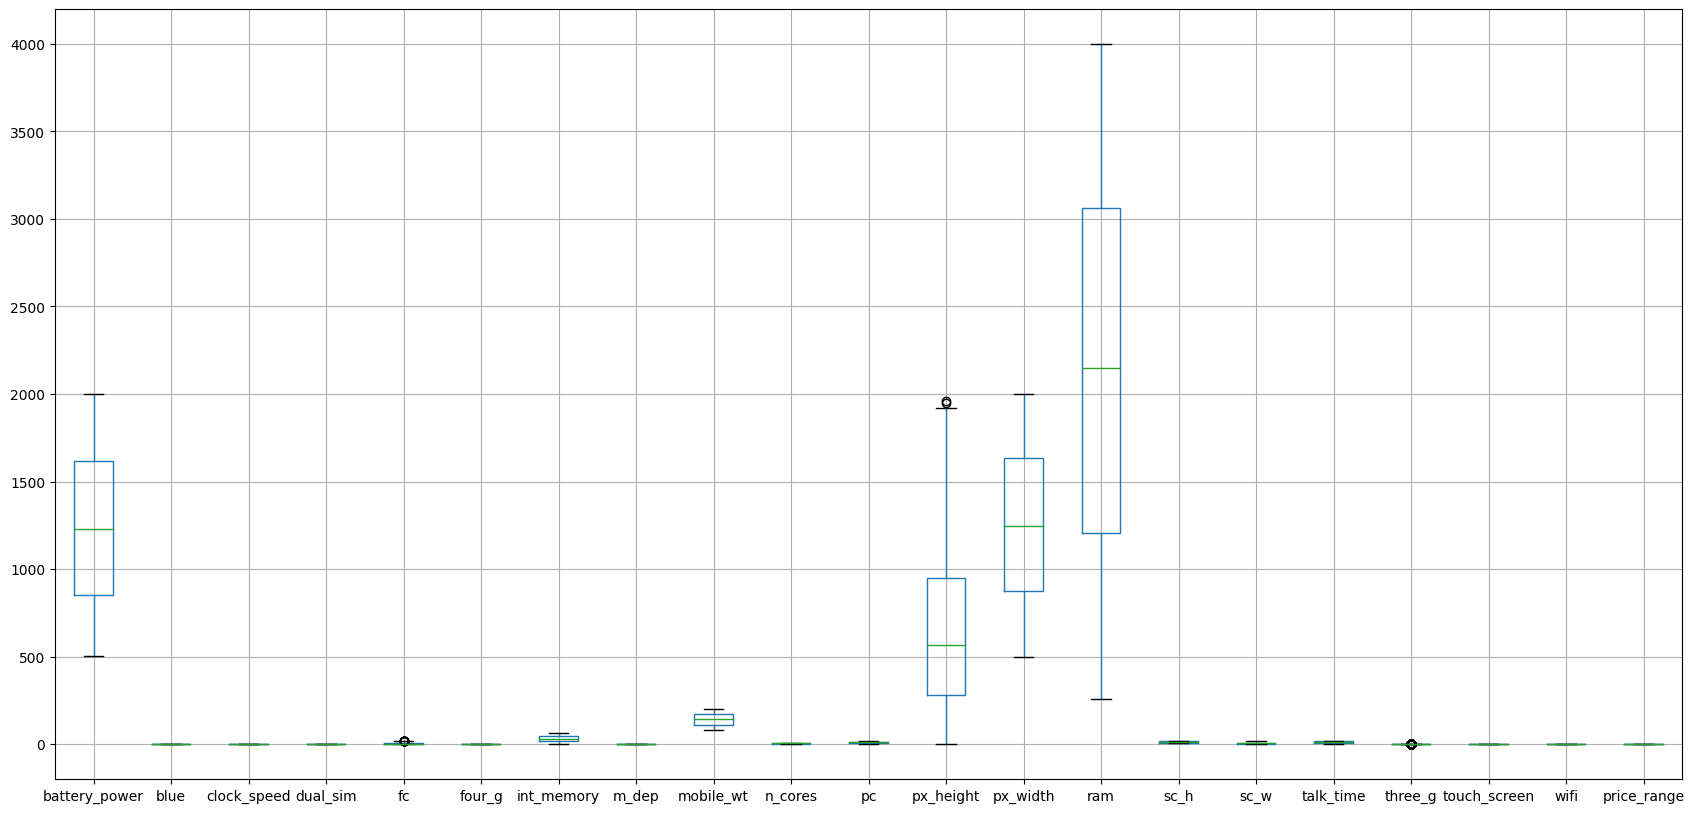

In [155]:
df.boxplot(figsize=(21,10))

In [4]:
X = df.drop(columns=['price_range'])
y = df['price_range'] #.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [6]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [5]:
display_labels = ['Baixo', 'Médio', 'Alto', 'Mto alto']

### dataset 2 (dft)

In [162]:
df.min(), df.max()

(battery_power    501.0
 blue               0.0
 clock_speed        0.5
 dual_sim           0.0
 fc                 0.0
 four_g             0.0
 int_memory         2.0
 m_dep              0.1
 mobile_wt         80.0
 n_cores            1.0
 pc                 0.0
 px_height          0.0
 px_width         500.0
 ram              256.0
 sc_h               5.0
 sc_w               0.0
 talk_time          2.0
 three_g            0.0
 touch_screen       0.0
 wifi               0.0
 price_range        0.0
 dtype: float64,
 battery_power    1998.0
 blue                1.0
 clock_speed         3.0
 dual_sim            1.0
 fc                 19.0
 four_g              1.0
 int_memory         64.0
 m_dep               1.0
 mobile_wt         200.0
 n_cores             8.0
 pc                 20.0
 px_height        1960.0
 px_width         1998.0
 ram              3998.0
 sc_h               19.0
 sc_w               18.0
 talk_time          20.0
 three_g             1.0
 touch_screen        1.0
 wif

In [255]:
dft = df.copy()
cols = ['mobile_wt', 'battery_power', 'px_height', 'px_width', 'ram'] # dft.drop(columns=['price_range']).columns
#scaler = MinMaxScaler()
for c in cols:
  scaler = MinMaxScaler((df[c].min()/100, df[c].max()/100))
  dft[c] = scaler.fit_transform(np.array(dft[c]).reshape(-1, 1))

<Axes: >

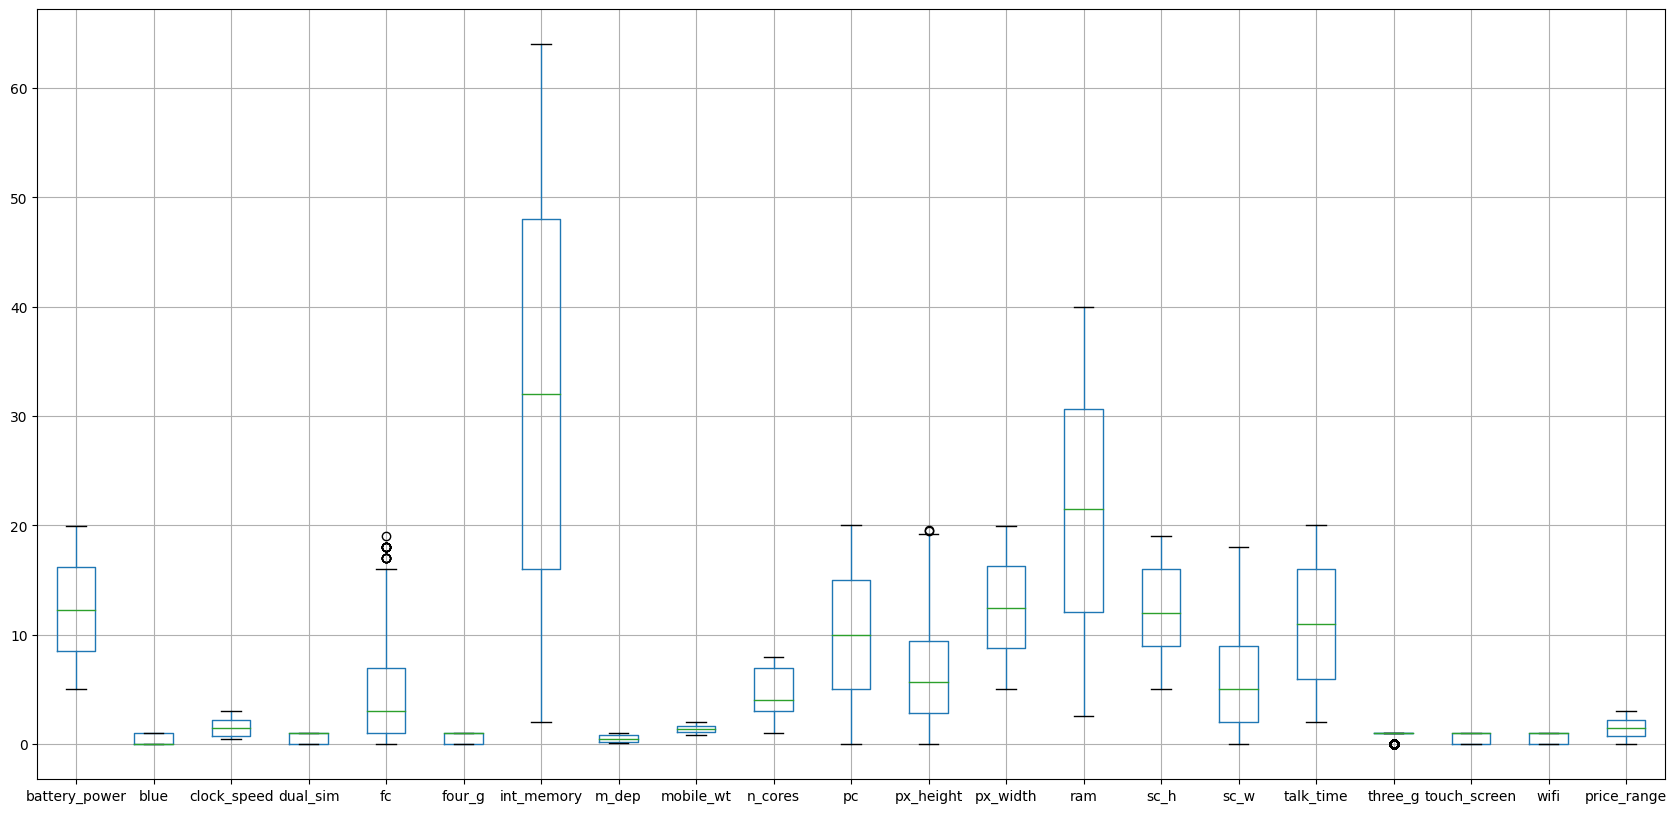

In [256]:
dft.boxplot(figsize=(21,10))

In [257]:
Xt = dft.drop(columns=['price_range'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xt, y, test_size=0.25, shuffle=True)

### Functions

In [7]:
def checkMetrics(test, pred, display=None):
  global y
  labels = np.sort(y.unique())
  print(f"Acurácia: {accuracy_score(test, pred)}")
  print(f"Precisão: {precision_score(test, pred, labels=labels, average='macro')}")
  print(f"Recall: {recall_score(test, pred, labels=labels, average='macro')}")
  print(f"F1-Score: {f1_score(test, pred, labels=labels, average='macro')}")
  print("Matriz de Confusão:")

  cm = confusion_matrix(test, pred, labels=labels)

  if(display):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display)
  else:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

  disp.plot()

  plt.show()

In [514]:
def pfi(model, x, y, name=None):
  result = permutation_importance(model, x, y,n_repeats=30, random_state=0)

  cols = [f"[{i}] - {x.columns[i]}" for i in range(len(x.columns))]

  importances = pd.Series(result.importances_mean, index=cols)

  fig, ax = plt.subplots()

  importances.plot.bar(yerr=result.importances_std, ax=ax)

  if(name):
    ax.set_title(f"Feature importances on {name} model")
  else:
    name = str(model)
    i = name.find('(')
    ax.set_title(f"Feature importances on {name[:i]} model\n{name[i:]}")
  ax.set_ylabel("Mean accuracy decrease")
  fig.tight_layout()
  plt.show()

In [456]:
def pdpClasses(model, x, features: list, res: int = 10, classes: list=[0,1,2,3]):
  global display_labels
  for idx in classes:
    pdp.from_estimator(model, x, features, target=idx, grid_resolution=res)
    plt.title(display_labels[idx])
  plt.show()

In [494]:
def pdp2versions(model_list: list | tuple, x_list: list | tuple, features: list, res: int = 10, classes: list=[0,1,2,3], axis:int=0):
  if(axis==0):
    for idx in classes:
      for i, (model, xt) in enumerate(zip(model_list, x_list)):
        name = str(model)
        print(f'\n{name[:name.find("(")]} {i+1}:')
        pdpClasses(model=model, x=xt, features=features, res=res, classes=[idx])
      print('\n'+"-"*60+'\n'+"-"*60)
  elif(axis==1):
    for i, (model, xt) in enumerate(zip(model_list, x_list)):
      name = str(model)
      print(f'\n{name[:name.find("(")]} {i+1}:')
      for idx in classes:
        pdpClasses(model=model, x=xt, features=features, res=res, classes=[idx])
      print('\n'+"-"*60+'\n'+"-"*60)
  else:
    print('axis deve ser igual a 0 ou 1')

# Models

## **Decision Trees**

### **LEARNING THE DECISION TREE CLASSIFIER**

In [177]:
dtree = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.5053191489361702, 0.9166666666666666, 'ram <= 2303.0\nentropy = 2.0\nsamples = 1500\nvalue = [384, 370, 366, 380]\nclass = y[0]'),
 Text(0.22340425531914893, 0.75, 'ram <= 1123.5\nentropy = 1.409\nsamples = 826\nvalue = [384, 342, 100, 0]\nclass = y[0]'),
 Text(0.10638297872340426, 0.5833333333333334, 'px_height <= 1058.5\nentropy = 0.521\nsamples = 350\nvalue = [309, 41, 0, 0]\nclass = y[0]'),
 Text(0.06382978723404255, 0.4166666666666667, 'battery_power <= 1838.0\nentropy = 0.305\nsamples = 294\nvalue = [278, 16, 0, 0]\nclass = y[0]'),
 Text(0.0425531914893617, 0.25, 'ram <= 1080.0\nentropy = 0.135\nsamples = 264\nvalue = [259, 5, 0, 0]\nclass = y[0]'),
 Text(0.02127659574468085, 0.08333333333333333, 'entropy = 0.067\nsamples = 253\nvalue = [251, 2, 0, 0]\nclass = y[0]'),
 Text(0.06382978723404255, 0.08333333333333333, 'entropy = 0.845\nsamples = 11\nvalue = [8, 3, 0, 0]\nclass = y[0]'),
 Text(0.0851063829787234, 0.25, 'entropy = 0.948\nsamples = 30\nvalue = [19, 11, 0, 0]\nc

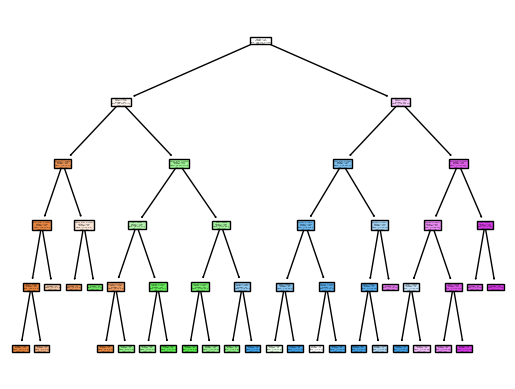

In [9]:
tree.plot_tree(dtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.828
Precisão: 0.8363819594642556
Recall: 0.8314472069361415
F1-Score: 0.8300675632966401
Matriz de Confusão:


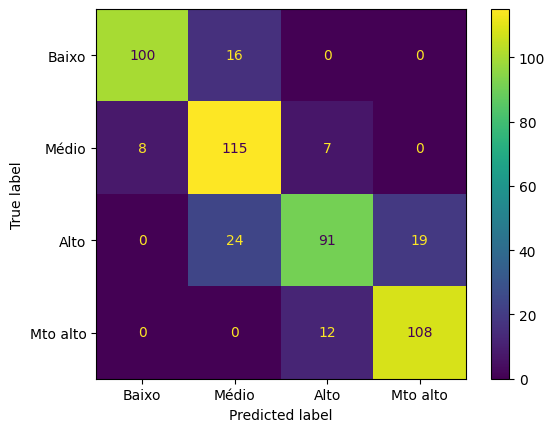

In [10]:
y_preddt1 = dtree.predict(X_test)
checkMetrics(y_test, y_preddt1, display=display_labels)

---

In [11]:
bigdtree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.5055803571428571, 0.9444444444444444, 'ram <= 2303.0\nentropy = 2.0\nsamples = 1500\nvalue = [384, 370, 366, 380]\nclass = y[0]'),
 Text(0.22098214285714285, 0.8333333333333334, 'ram <= 1123.5\nentropy = 1.409\nsamples = 826\nvalue = [384, 342, 100, 0]\nclass = y[0]'),
 Text(0.10714285714285714, 0.7222222222222222, 'px_height <= 1058.5\nentropy = 0.521\nsamples = 350\nvalue = [309, 41, 0, 0]\nclass = y[0]'),
 Text(0.07142857142857142, 0.6111111111111112, 'battery_power <= 1838.0\nentropy = 0.305\nsamples = 294\nvalue = [278, 16, 0, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0.5, 'ram <= 1080.0\nentropy = 0.135\nsamples = 264\nvalue = [259, 5, 0, 0]\nclass = y[0]'),
 Text(0.03571428571428571, 0.3888888888888889, 'battery_power <= 1503.0\nentropy = 0.067\nsamples = 253\nvalue = [251, 2, 0, 0]\nclass = y[0]'),
 Text(0.017857142857142856, 0.2777777777777778, 'entropy = 0.0\nsamples = 198\nvalue = [198, 0, 0, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0.2777777777777778, 'ra

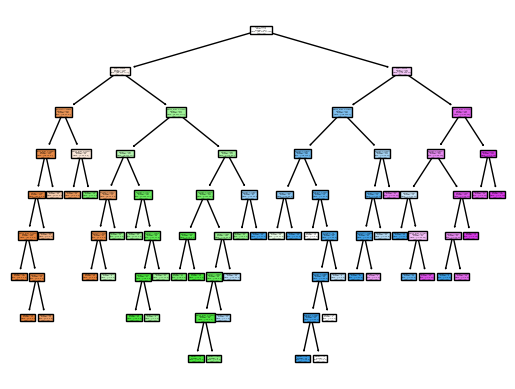

In [12]:
tree.plot_tree(bigdtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.814
Precisão: 0.822366001555026
Recall: 0.8163613299549995
F1-Score: 0.8176162269487609
Matriz de Confusão:


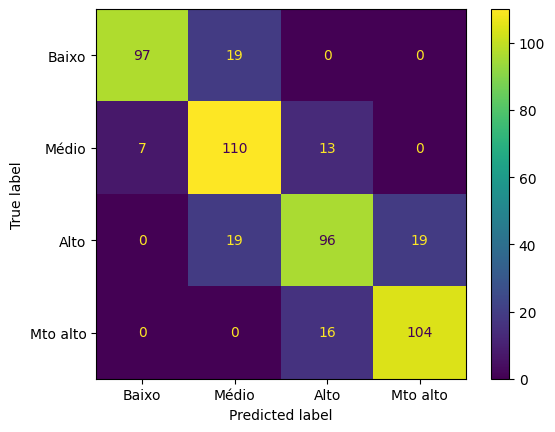

In [13]:
y_preddt2 = bigdtree.predict(X_test)
checkMetrics(y_test, y_preddt2, display_labels)

piorou! indicativo de overfitting

Observação: As previsões erradas são bem alinhadas com seus labels originais, por exemplo, não há ocasiões em que celulares de preços altos foram previstos tendo preços baixos, só de preços médios e muito altos



---


### **LEARNING THE DECISION TREE CLASSIFIER 2**

In [258]:
dtree2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train2, y_train2)

[Text(0.4895833333333333, 0.9166666666666666, 'ram <= 0.103\nentropy = 2.0\nsamples = 1500\nvalue = [388, 373, 370, 369]\nclass = y[0]'),
 Text(0.19791666666666666, 0.75, 'ram <= -0.923\nentropy = 1.355\nsamples = 793\nvalue = [388, 329, 76, 0]\nclass = y[0]'),
 Text(0.08333333333333333, 0.5833333333333334, 'px_width <= 0.796\nentropy = 0.483\nsamples = 354\nvalue = [317, 37, 0, 0]\nclass = y[0]'),
 Text(0.041666666666666664, 0.4166666666666667, 'ram <= -1.193\nentropy = 0.246\nsamples = 270\nvalue = [259, 11, 0, 0]\nclass = y[0]'),
 Text(0.020833333333333332, 0.25, 'entropy = 0.0\nsamples = 185\nvalue = [185, 0, 0, 0]\nclass = y[0]'),
 Text(0.0625, 0.25, 'battery_power <= 1.223\nentropy = 0.556\nsamples = 85\nvalue = [74, 11, 0, 0]\nclass = y[0]'),
 Text(0.041666666666666664, 0.08333333333333333, 'entropy = 0.3\nsamples = 75\nvalue = [71, 4, 0, 0]\nclass = y[0]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7, 0, 0]\nclass = y[1]'),
 Tex

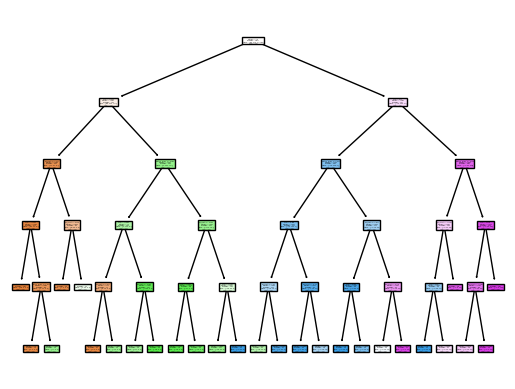

In [225]:
tree.plot_tree(dtree2, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.782
Precisão: 0.7854151108225769
Recall: 0.7866992673254016
F1-Score: 0.7844973427948617
Matriz de Confusão:


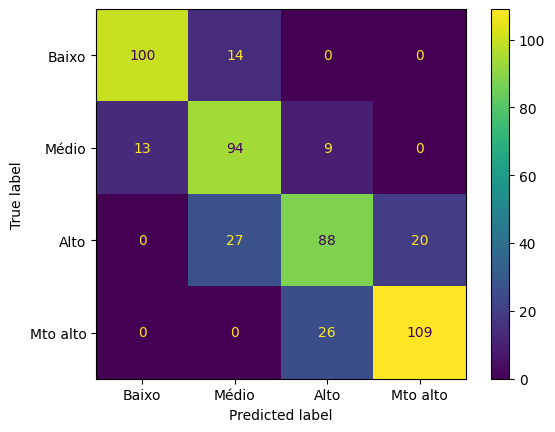

In [259]:
y_preddt1 = dtree2.predict(X_test2)
checkMetrics(y_test2, y_preddt1, display=display_labels)

---

In [260]:
bigdtree2 = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train2, y_train2)

[Text(0.49330357142857145, 0.9375, 'ram <= 0.103\nentropy = 2.0\nsamples = 1500\nvalue = [388, 373, 370, 369]\nclass = y[0]'),
 Text(0.18080357142857142, 0.8125, 'ram <= -0.923\nentropy = 1.355\nsamples = 793\nvalue = [388, 329, 76, 0]\nclass = y[0]'),
 Text(0.07142857142857142, 0.6875, 'px_width <= 0.796\nentropy = 0.483\nsamples = 354\nvalue = [317, 37, 0, 0]\nclass = y[0]'),
 Text(0.03571428571428571, 0.5625, 'ram <= -1.193\nentropy = 0.246\nsamples = 270\nvalue = [259, 11, 0, 0]\nclass = y[0]'),
 Text(0.017857142857142856, 0.4375, 'entropy = 0.0\nsamples = 185\nvalue = [185, 0, 0, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0.4375, 'battery_power <= 1.223\nentropy = 0.556\nsamples = 85\nvalue = [74, 11, 0, 0]\nclass = y[0]'),
 Text(0.03571428571428571, 0.3125, 'px_height <= 0.331\nentropy = 0.3\nsamples = 75\nvalue = [71, 4, 0, 0]\nclass = y[0]'),
 Text(0.017857142857142856, 0.1875, 'entropy = 0.0\nsamples = 59\nvalue = [59, 0, 0, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0

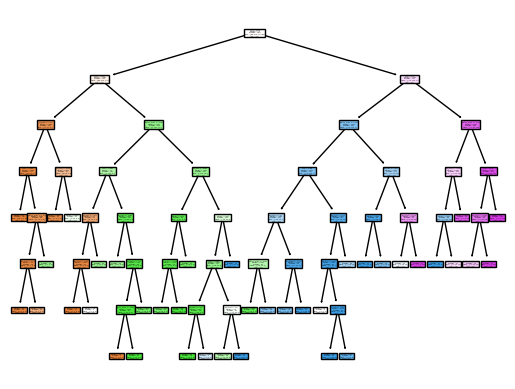

In [228]:
tree.plot_tree(bigdtree2, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.782
Precisão: 0.7836104057875384
Recall: 0.7854859850776366
F1-Score: 0.7839208264381846
Matriz de Confusão:


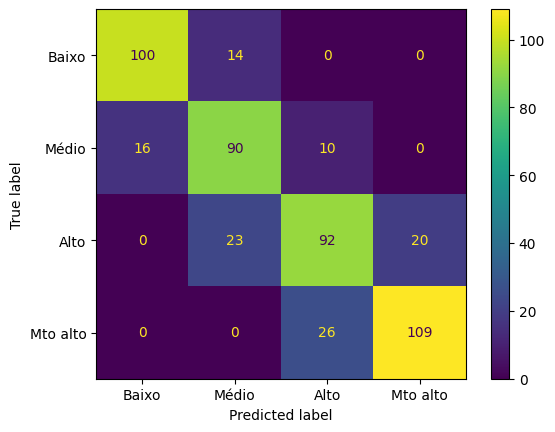

In [261]:
y_preddt2 = bigdtree2.predict(X_test2)
checkMetrics(y_test2, y_preddt2, display_labels)

---
---

## **Random Forests**

###**LEARNING THE RF CLASSIFIER**

In [14]:
rforest = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

In [15]:
y_predrf = rforest.predict(X_test)

Acurácia: 0.85
Precisão: 0.8541587985890904
Recall: 0.8543049837021788
F1-Score: 0.8541894626503058
Matriz de Confusão:


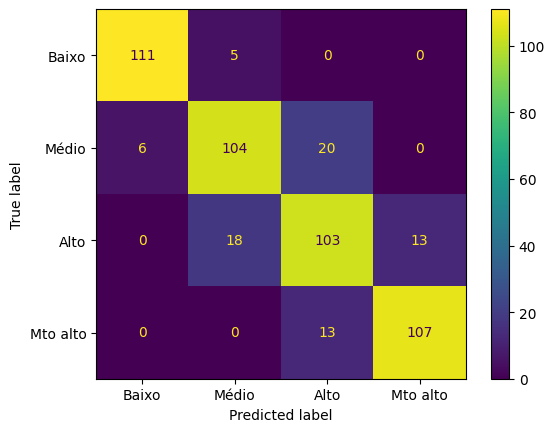

In [16]:
checkMetrics(y_test, y_predrf, display_labels)

---
###**LEARNING THE RF CLASSIFIER 2**

In [397]:
rforest2 = RandomForestClassifier(max_depth=10).fit(X_train2, y_train2)

In [400]:
y_predrf = rforest2.predict(X_test2)

Acurácia: 0.856
Precisão: 0.8582373636507494
Recall: 0.8577955905088391
F1-Score: 0.8574621694928858
Matriz de Confusão:


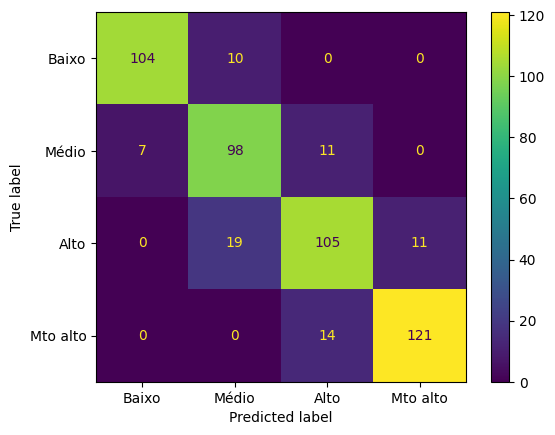

In [401]:
checkMetrics(y_test2, y_predrf, display_labels)

---
---
## **KNNs**

### **LEARNING THE KNN CLASSIFIER**

9


<Axes: >

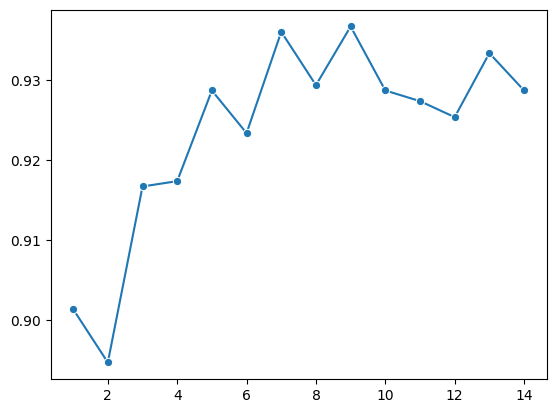

In [195]:
k_values = [i for i in range(1,15)]
scores = []

for k in k_values:
  tknn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(tknn, X_train, y_train, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [196]:
knn = KNeighborsClassifier(n_neighbors=k_best).fit(X_train, y_train)

Acurácia: 0.908
Precisão: 0.9096070725426785
Recall: 0.9099213811578711
F1-Score: 0.9093647644568275
Matriz de Confusão:


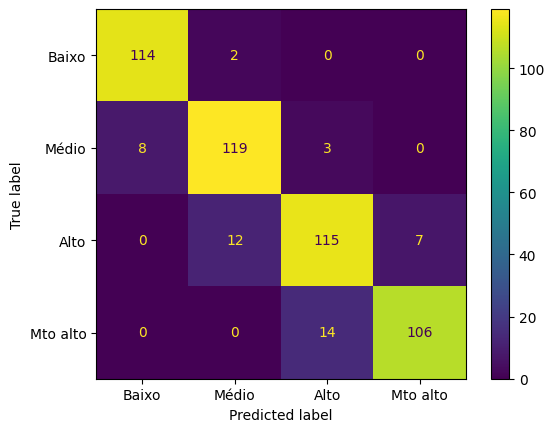

In [197]:
y_predknn = knn.predict(X_test)
checkMetrics(y_test, y_predknn, display_labels)

---
###**LEARNING THE KNN CLASSIFIER 2**

14


<Axes: >

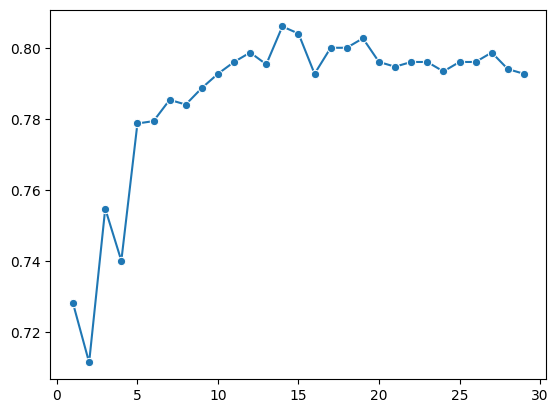

In [262]:
k_values = [i for i in range(1,30)]
scores = []

for k in k_values:
  tknn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(tknn, X_train2, y_train2, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [267]:
knn2 = KNeighborsClassifier(n_neighbors=k_best).fit(X_train2, y_train2)

Acurácia: 0.8
Precisão: 0.8013923020495227
Recall: 0.8025694024332863
F1-Score: 0.7998173226082996
Matriz de Confusão:


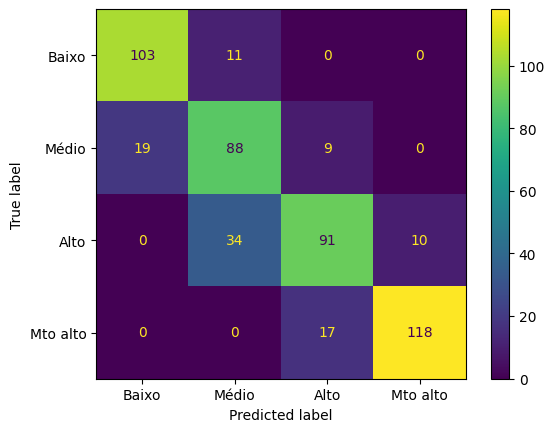

In [268]:
y_predknn = knn2.predict(X_test2)
checkMetrics(y_test2, y_predknn, display_labels)

---
---
## **MLPs**

###**LEARNING THE MLP CLASSIFIER**

In [390]:
seed = randint(0, 4294967295)
#seed = 4262000293
mlp = MLPClassifier(learning_rate_init=0.001, alpha=0.1, random_state=seed, max_iter=1000).fit(X_train, y_train)
#mlp = MLPClassifier(solver='lbfgs', random_state=seed, max_fun=30000).fit(X_train, y_train)

<Axes: >

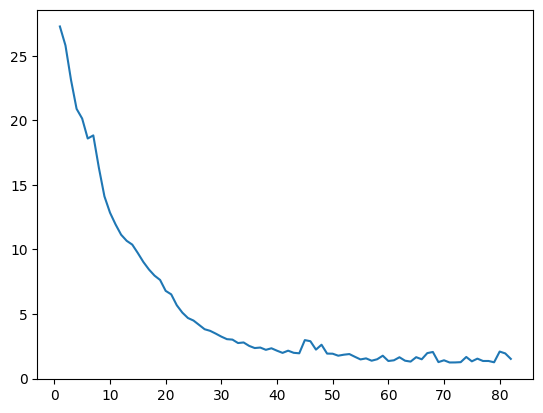

In [391]:
sns.lineplot(y=mlp.loss_curve_, x=range(1, mlp.n_iter_ + 1))

Acurácia: 0.71
Precisão: 0.7297997605291471
Recall: 0.718310305237737
F1-Score: 0.7058274651361316
Matriz de Confusão:


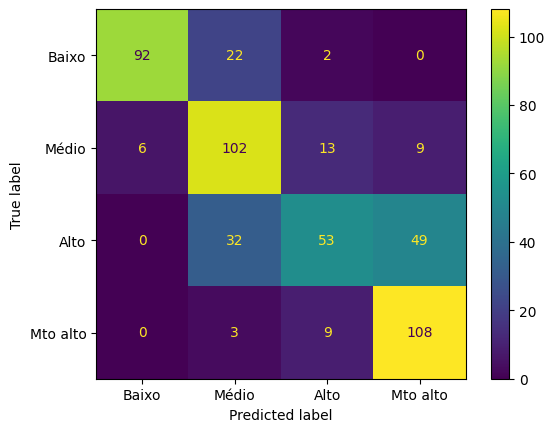

No layers: 3


MLPClassifier(alpha=0.1, max_iter=1000, random_state=3609113067)

In [392]:
y_predmlp = mlp.predict(X_test)
checkMetrics(y_test, y_predmlp, display_labels)
print("No layers:", mlp.n_layers_)
mlp

---
###**LEARNING THE MLP CLASSIFIER 2**

In [393]:
seed = randint(0, 4294967295)
#seed = 4262000293
mlp2 = MLPClassifier(learning_rate_init=0.05, alpha=0.5, random_state=seed, early_stopping=True, max_iter=1000).fit(X_train2, y_train2)
#mlp = MLPClassifier(solver='lbfgs', random_state=seed, max_fun=30000).fit(X_train, y_train)

<Axes: >

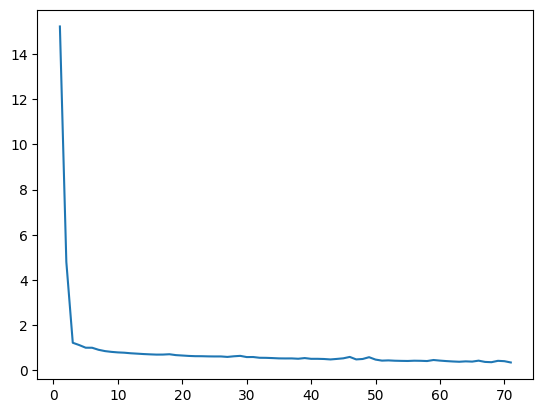

In [394]:
sns.lineplot(y=mlp2.loss_curve_, x=range(1, mlp2.n_iter_ + 1))

Acurácia: 0.846
Precisão: 0.8492849508956379
Recall: 0.8514174564764402
F1-Score: 0.8462825393600253
Matriz de Confusão:


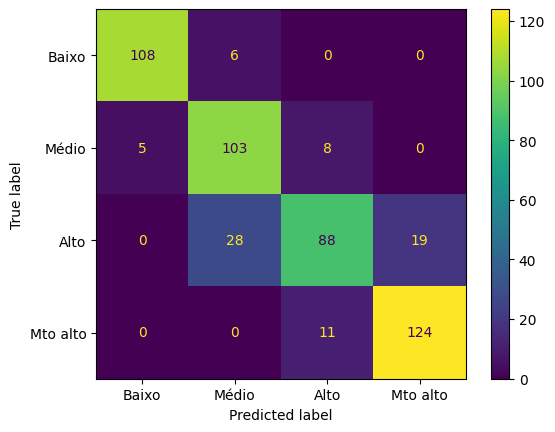

No layers: 3


MLPClassifier(alpha=0.5, early_stopping=True, learning_rate_init=0.05,
              max_iter=1000, random_state=1779683021)

In [395]:
y_predmlp = mlp2.predict(X_test2)
checkMetrics(y_test2, y_predmlp, display_labels)
print("No layers:", mlp2.n_layers_)
mlp2

---
---
# PFIs + PDPs

Todos os PFIs foram plotados foram nessa ordem: o 1o é de um modelo treinado com dataset original e o 2o é de um modelo treinado com o dataset com features escaladas. Todos os modelos (menos os MLPs) foram treinados com os mesmos hiperparâmetros para ser feita uma análise da diferença entre esses modelos.

In [488]:
xtrains = (X_train, X_train2)

---
### dtree

In [496]:
dtrees = (dtree, dtree2)

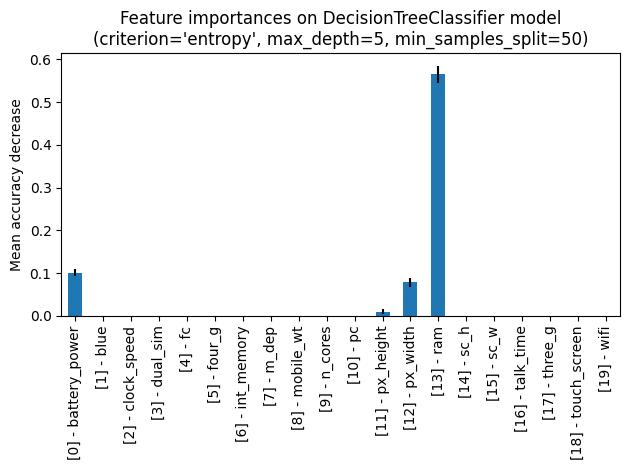

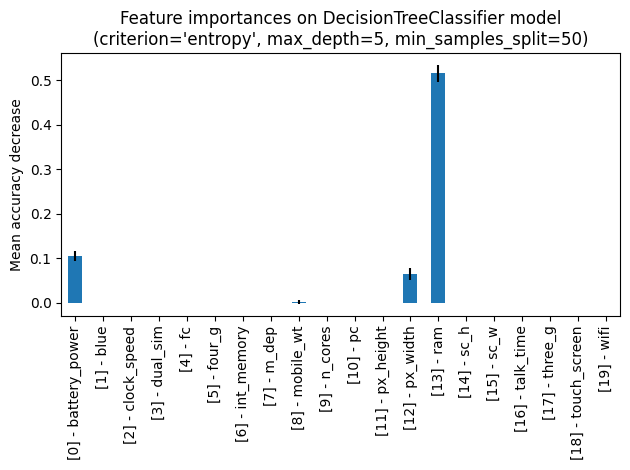

In [516]:
pfi(dtree, X_test, y_test)
pfi(dtree2, X_test2, y_test2)


DecisionTreeClassifier 1:


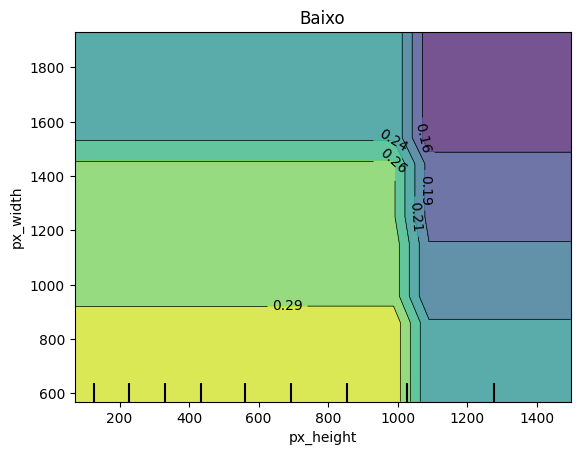


DecisionTreeClassifier 2:


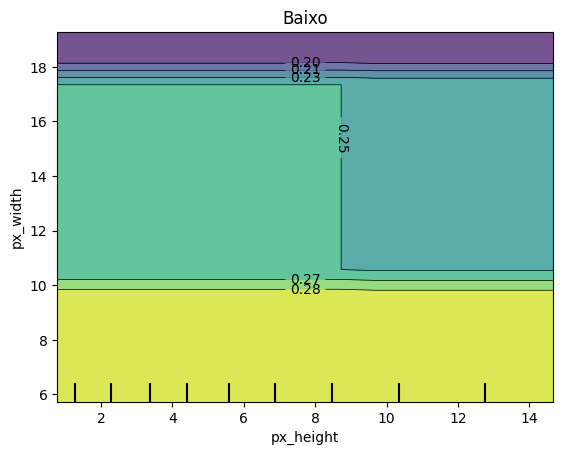


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


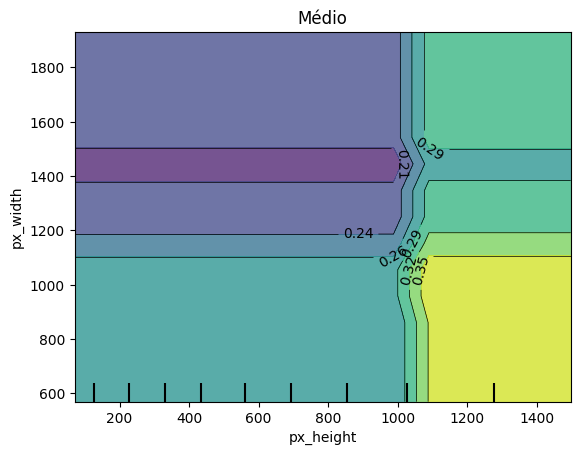


DecisionTreeClassifier 2:


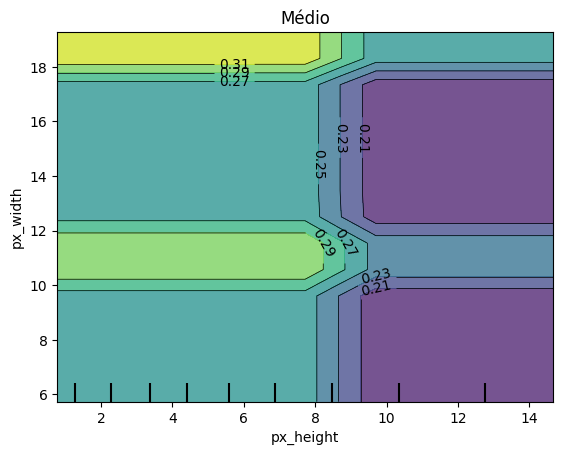


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


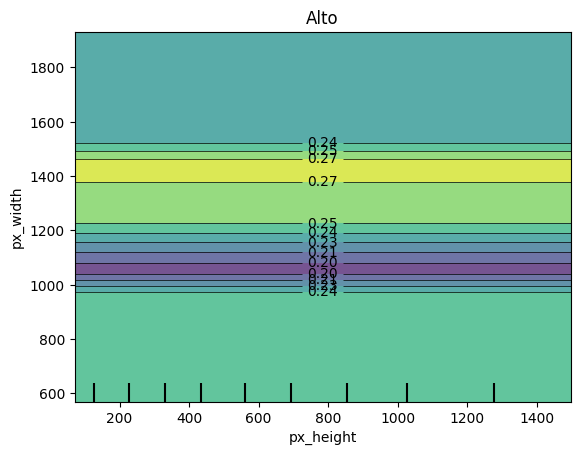


DecisionTreeClassifier 2:


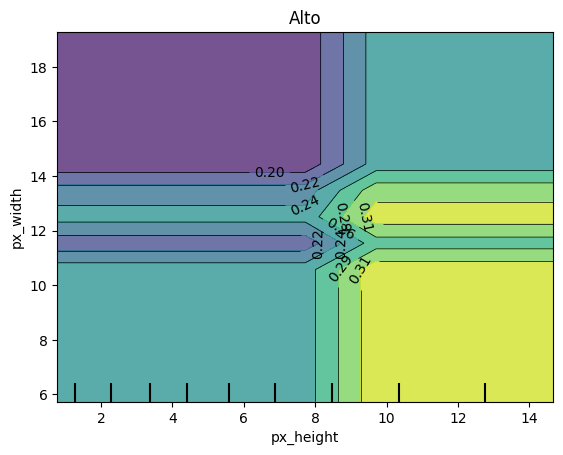


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


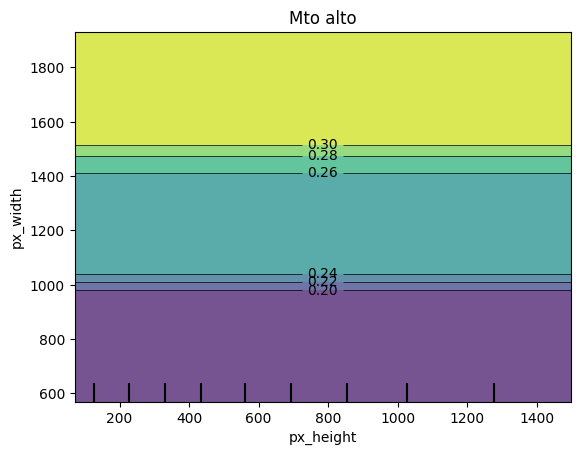


DecisionTreeClassifier 2:


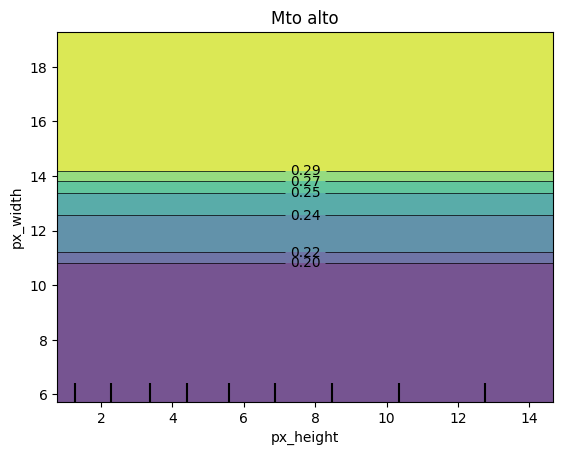


------------------------------------------------------------
------------------------------------------------------------


In [491]:
# px_height, px_width
pdp2versions(dtrees, xtrains, [(11,12)], 15)


DecisionTreeClassifier 1:


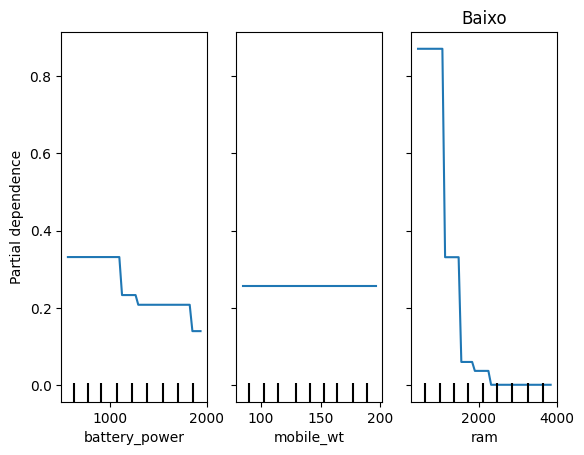

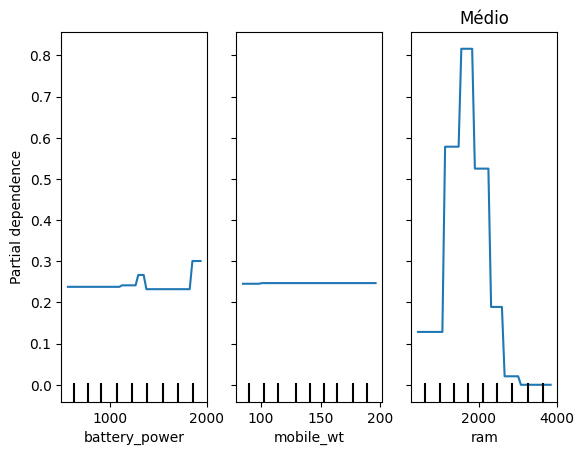

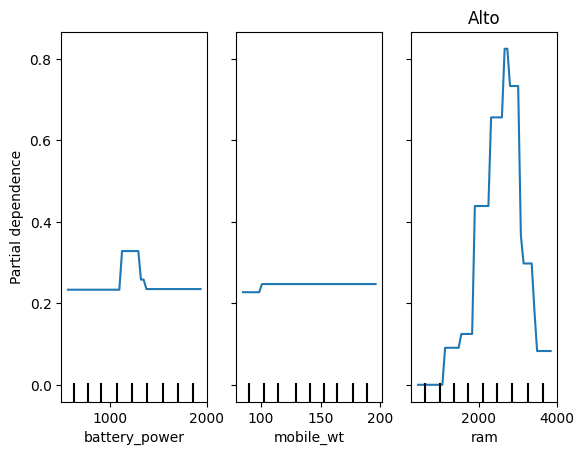

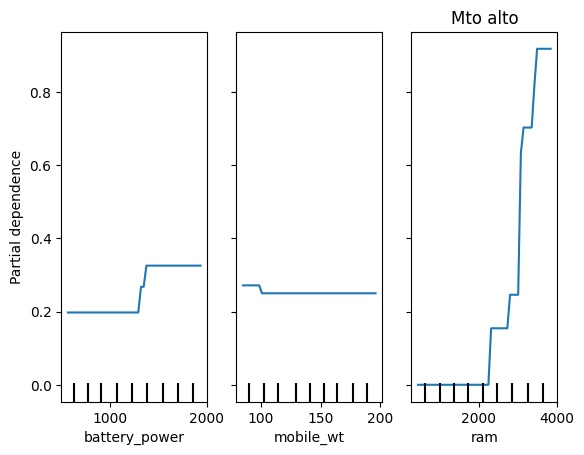


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 2:


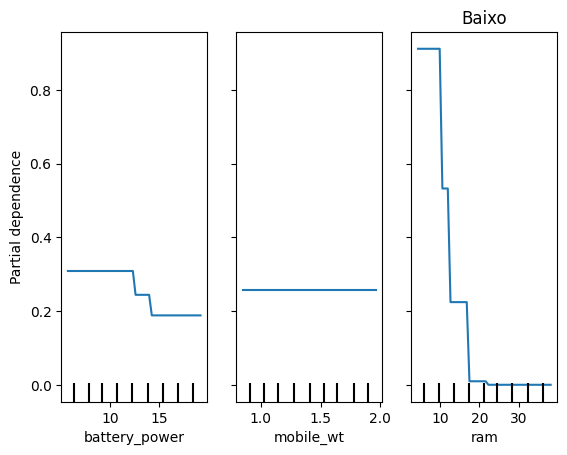

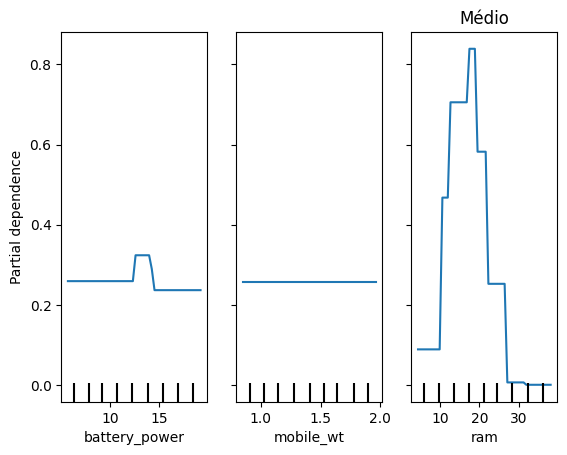

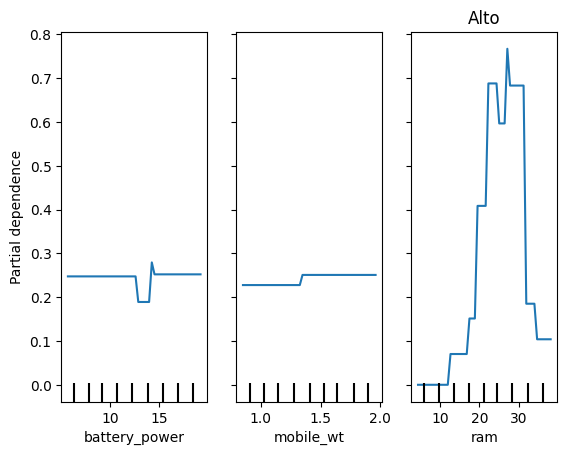

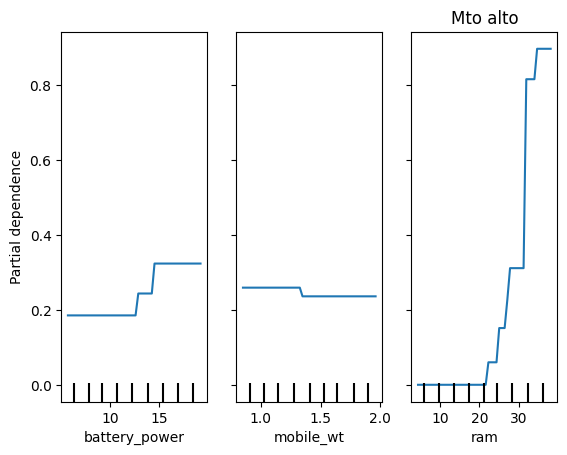


------------------------------------------------------------
------------------------------------------------------------


In [495]:
pdp2versions(dtrees, xtrains, [0,8,13], 50, axis=1)

---

In [497]:
bigdtrees = (bigdtree, bigdtree2)

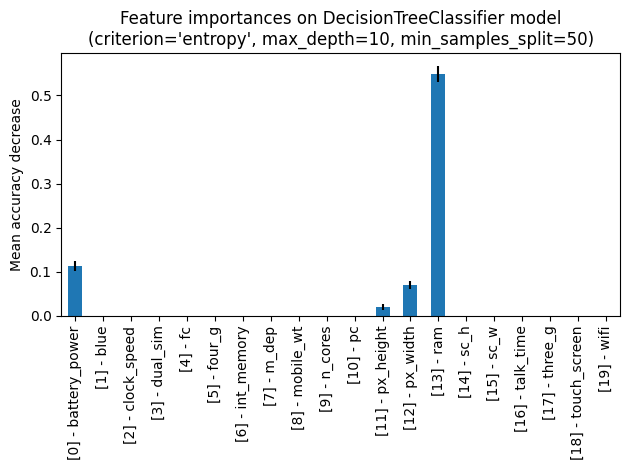

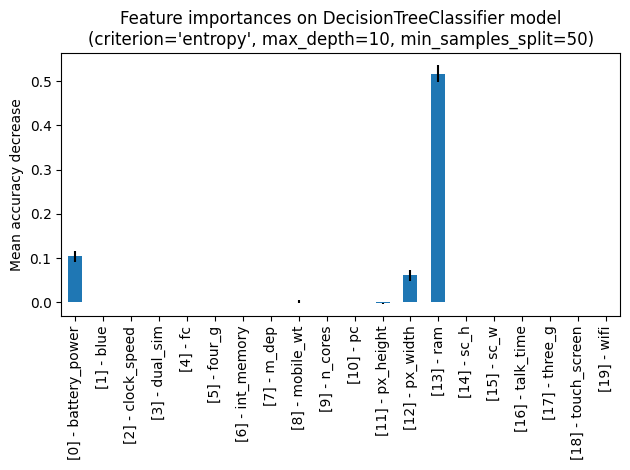

In [517]:
pfi(bigdtree, X_test, y_test)
pfi(bigdtree2, X_test2, y_test2)


DecisionTreeClassifier 1:


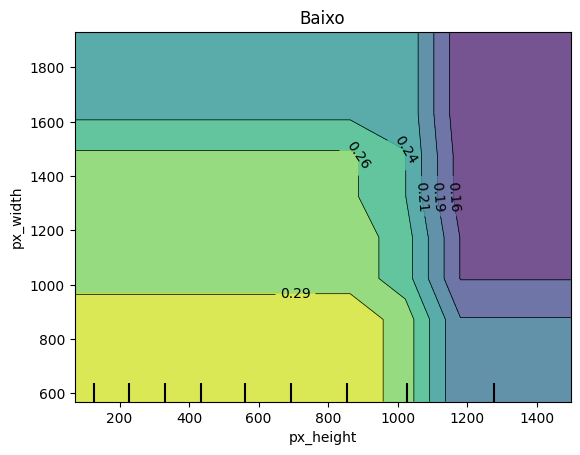

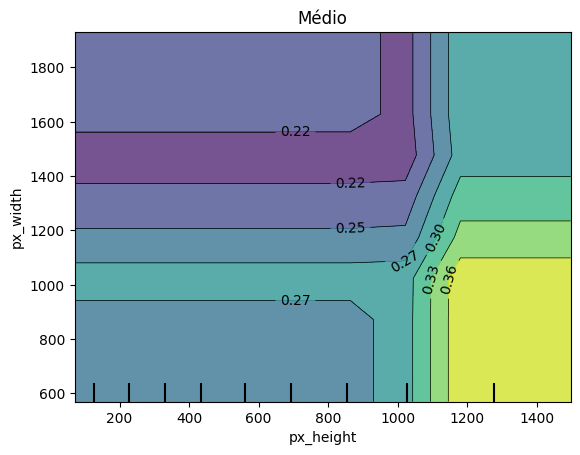

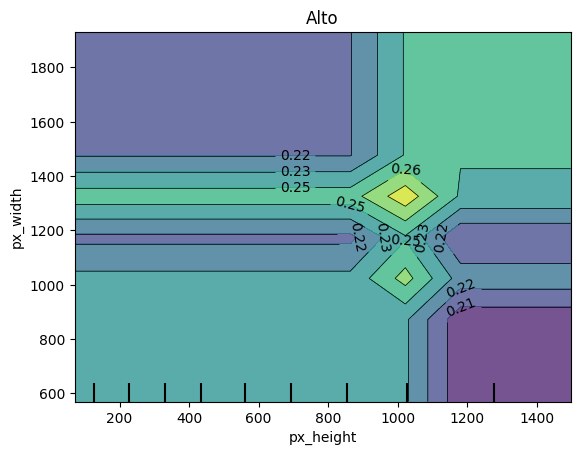

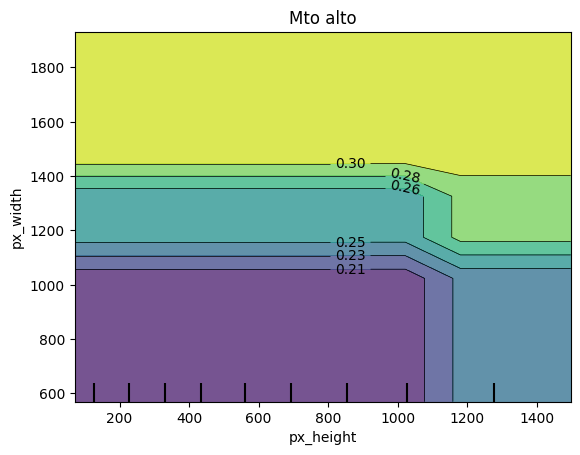


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 2:


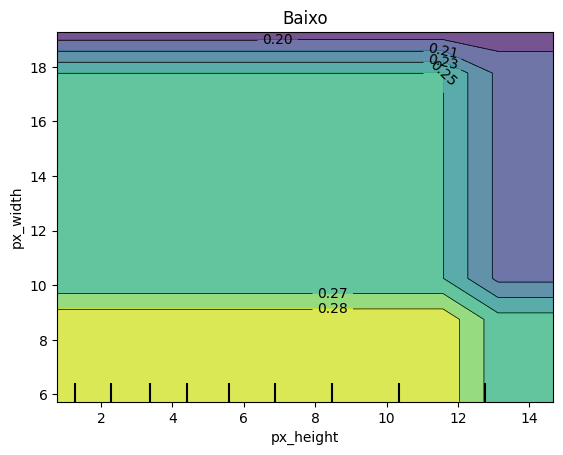

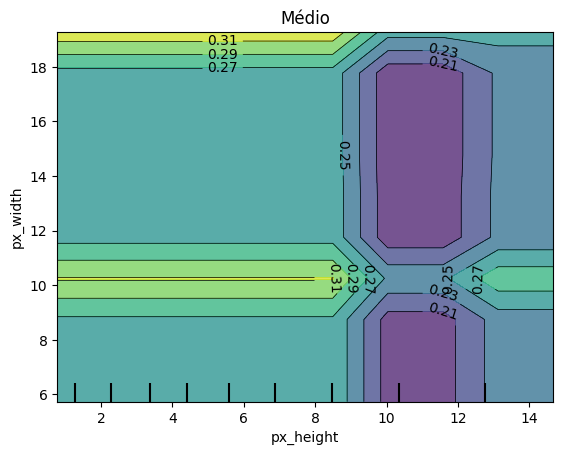

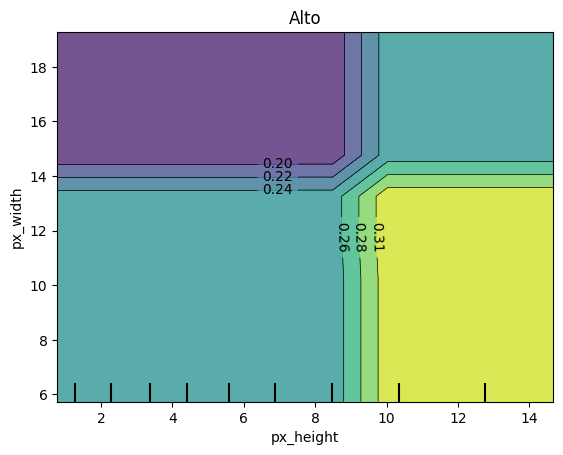

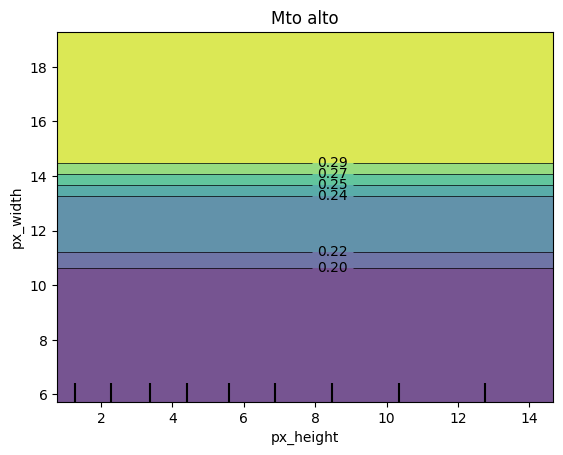


------------------------------------------------------------
------------------------------------------------------------


In [500]:
# px_height, px_width
pdp2versions(bigdtrees, xtrains, [(11, 12)], axis=1)


DecisionTreeClassifier 1:


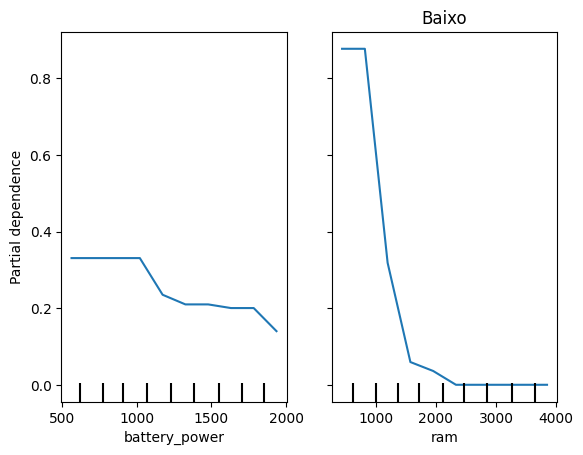


DecisionTreeClassifier 2:


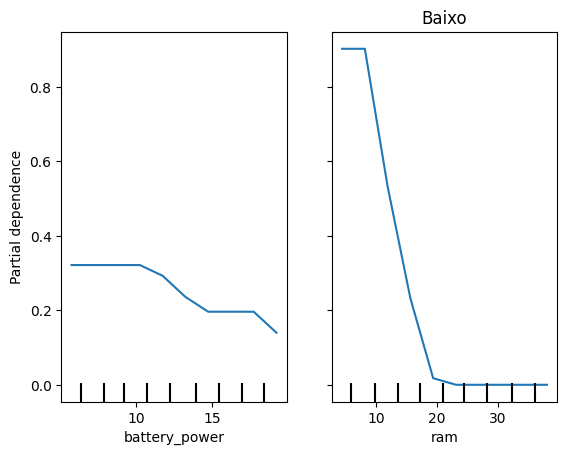


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


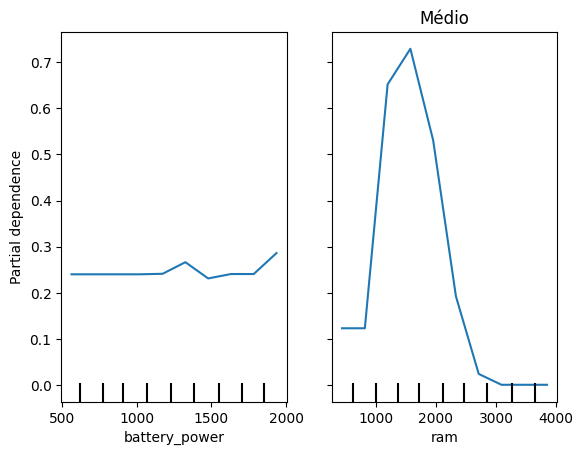


DecisionTreeClassifier 2:


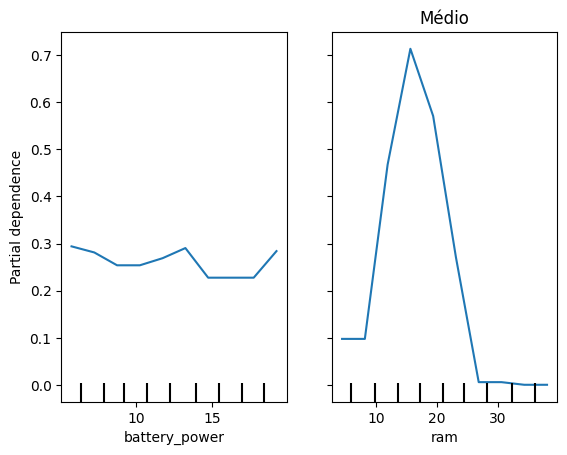


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


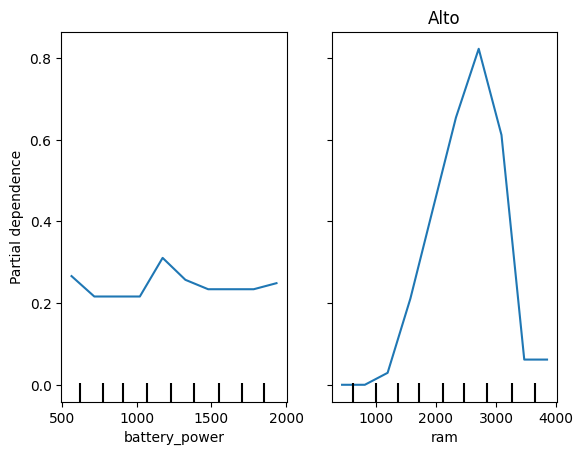


DecisionTreeClassifier 2:


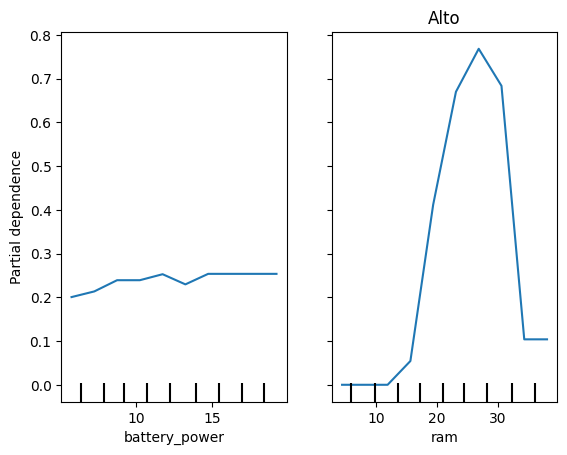


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


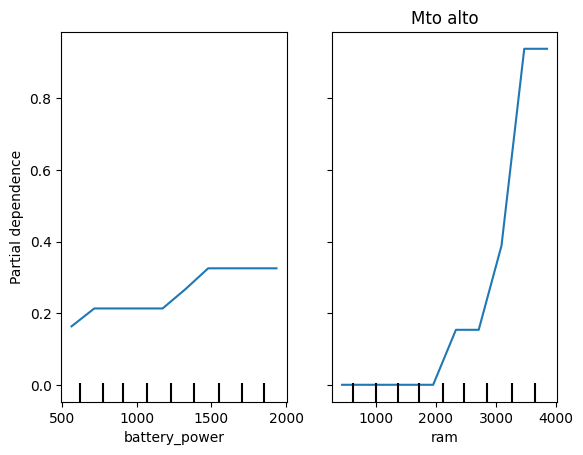


DecisionTreeClassifier 2:


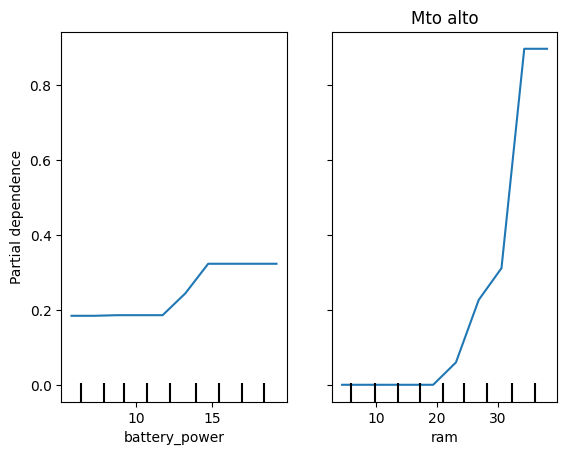


------------------------------------------------------------
------------------------------------------------------------


In [499]:
pdp2versions(bigdtrees, xtrains, [0, 13])

---


DecisionTreeClassifier 1:


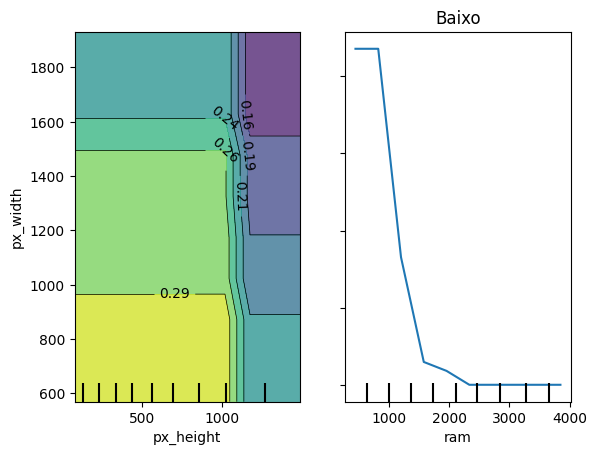


DecisionTreeClassifier 2:


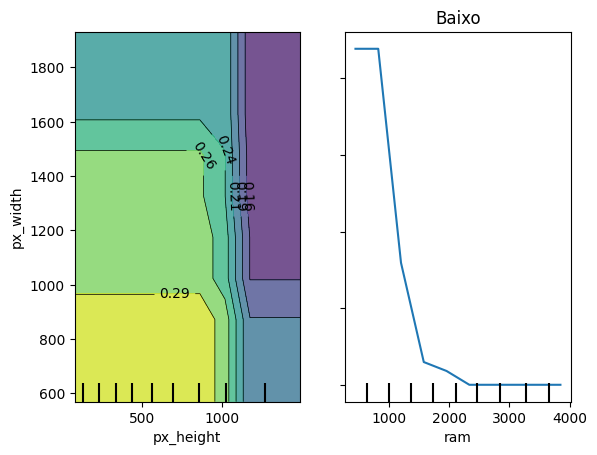


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


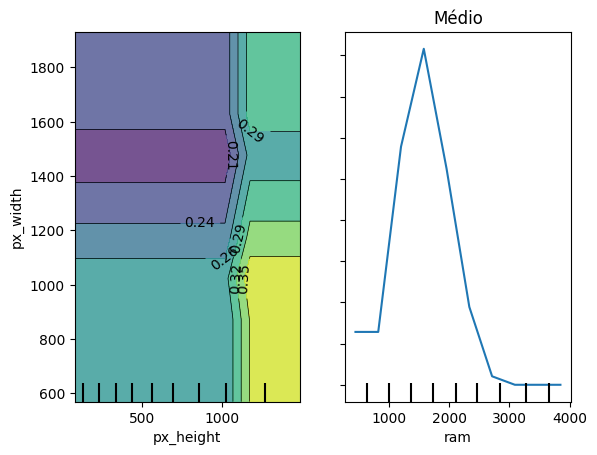


DecisionTreeClassifier 2:


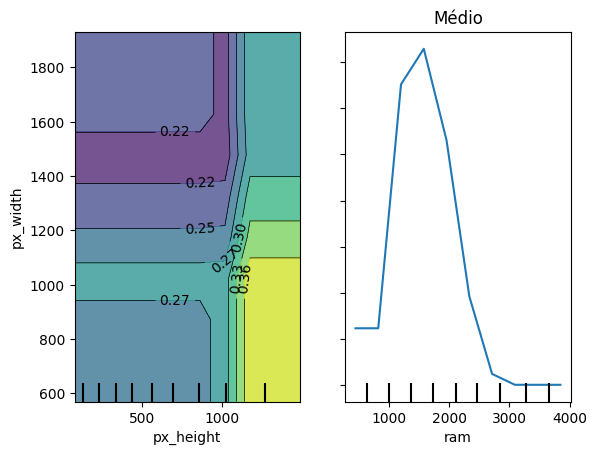


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


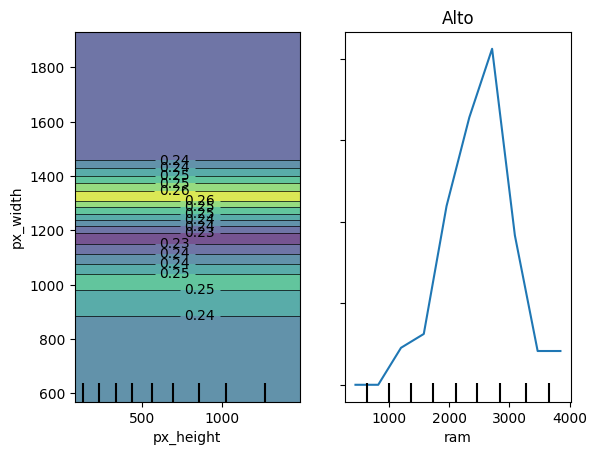


DecisionTreeClassifier 2:


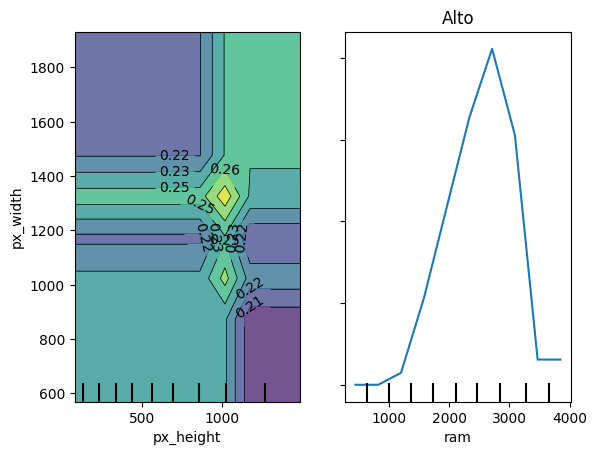


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


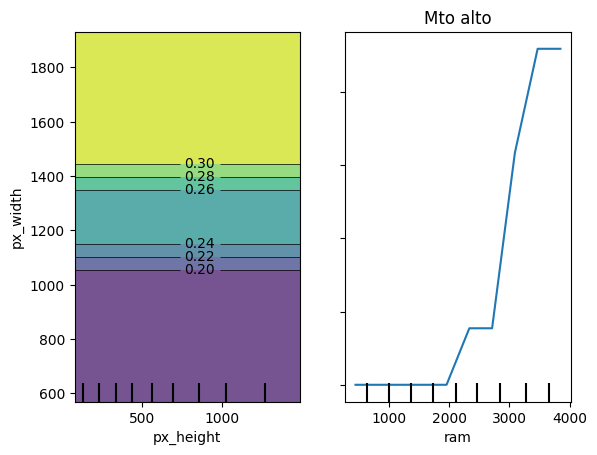


DecisionTreeClassifier 2:


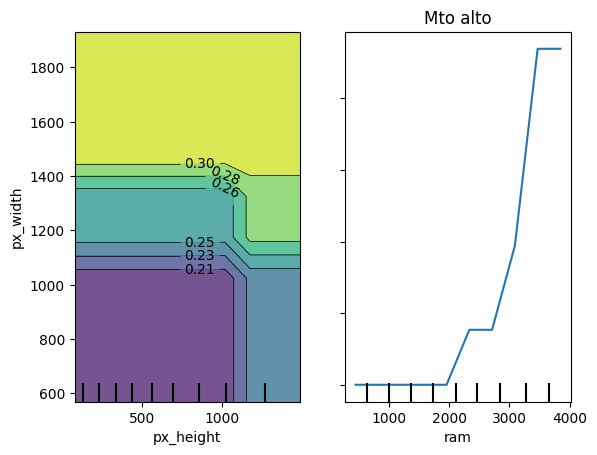


------------------------------------------------------------
------------------------------------------------------------


In [502]:
pdp2versions((dtree, bigdtree), (X_train, X_train), [(11, 12), 13], res=10)


DecisionTreeClassifier 1:


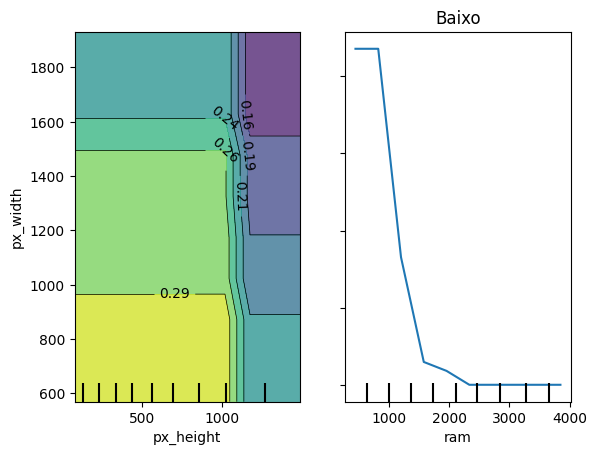


DecisionTreeClassifier 2:


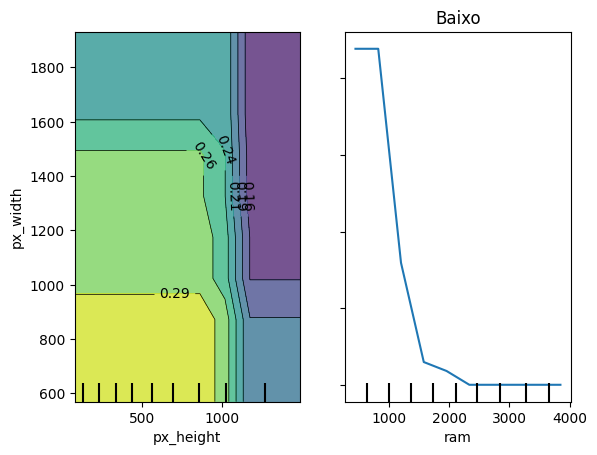


DecisionTreeClassifier 3:


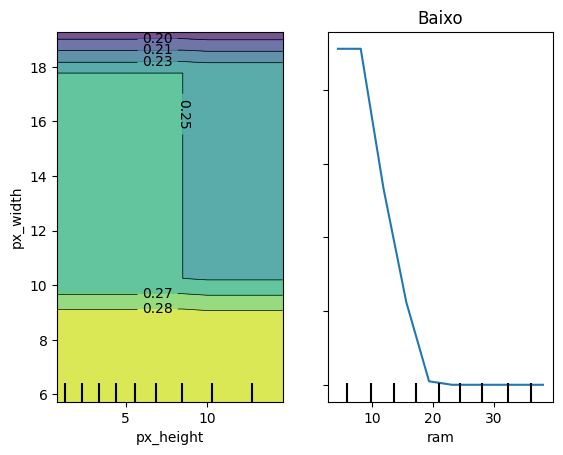


DecisionTreeClassifier 4:


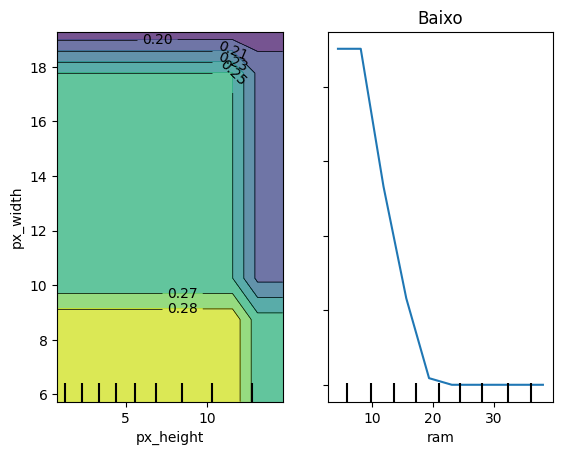


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


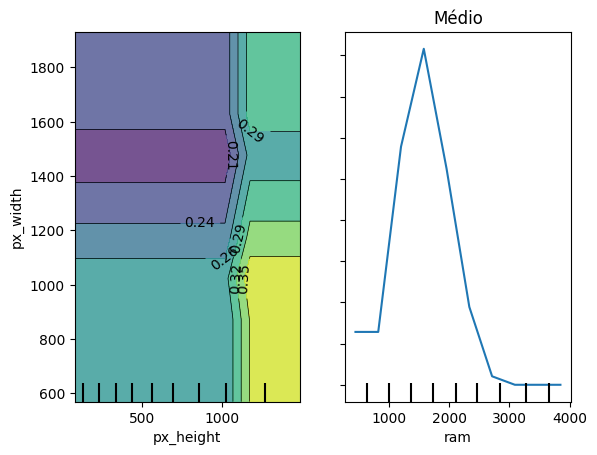


DecisionTreeClassifier 2:


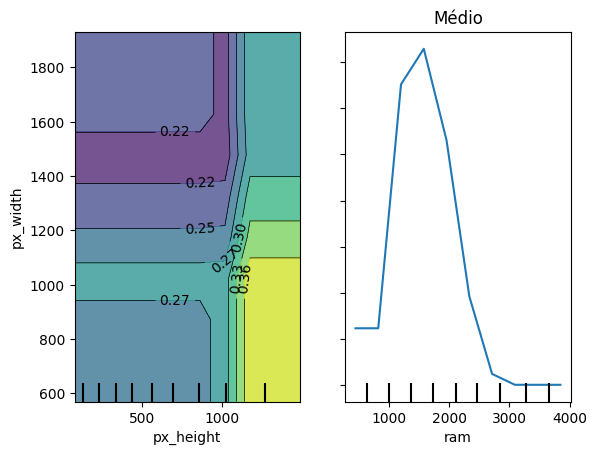


DecisionTreeClassifier 3:


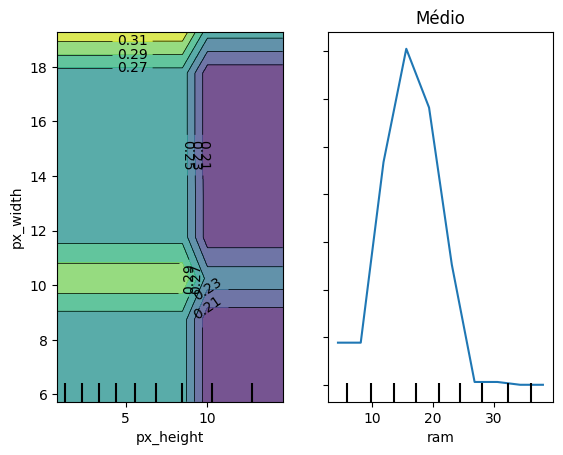


DecisionTreeClassifier 4:


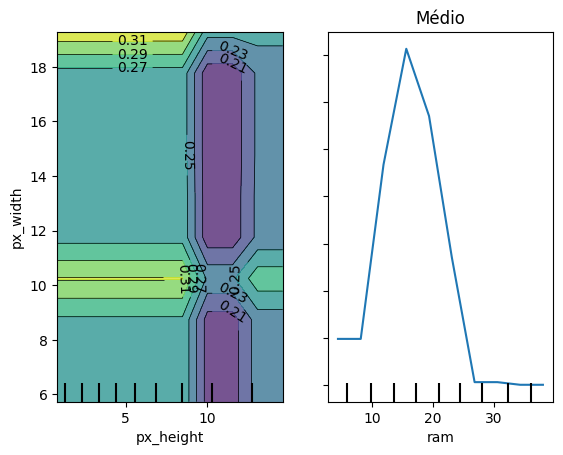


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


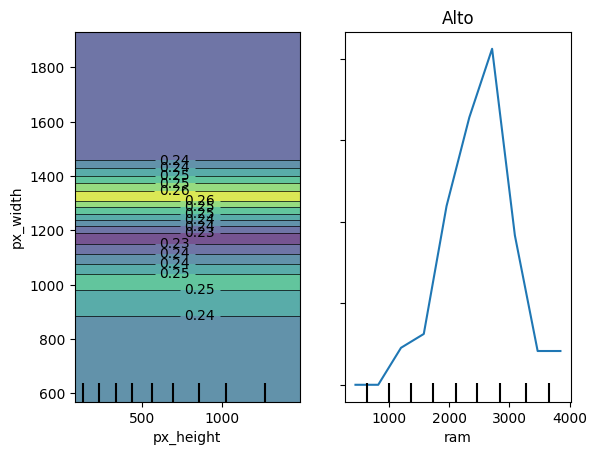


DecisionTreeClassifier 2:


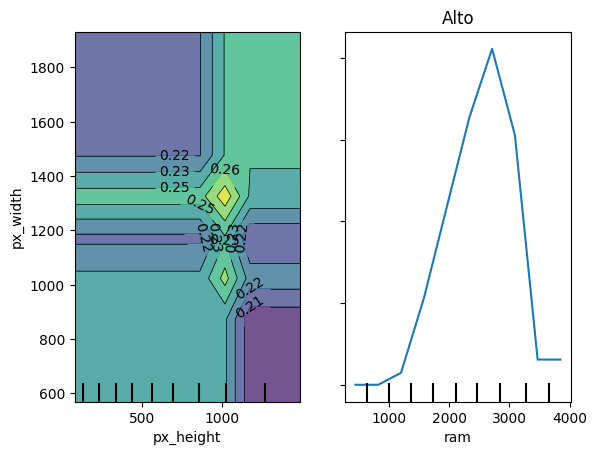


DecisionTreeClassifier 3:


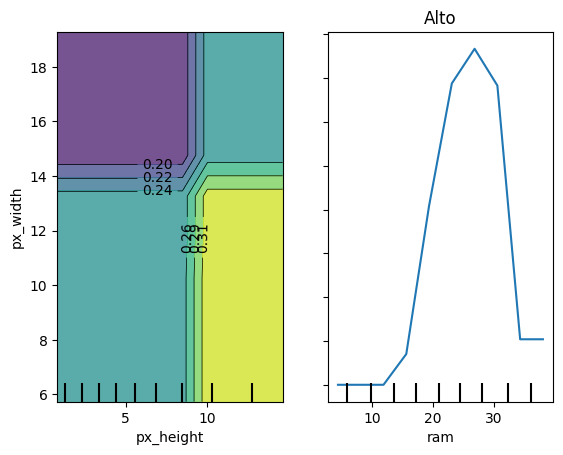


DecisionTreeClassifier 4:


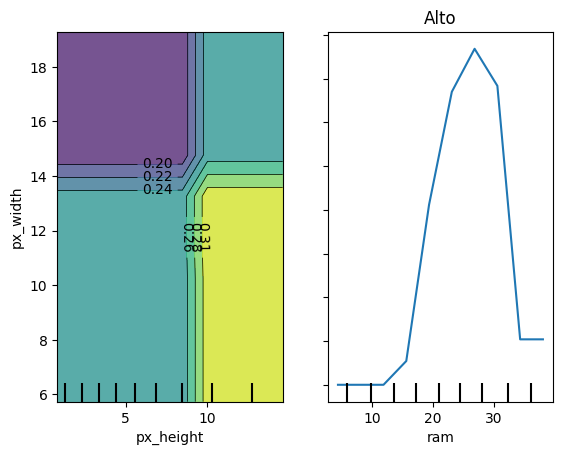


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


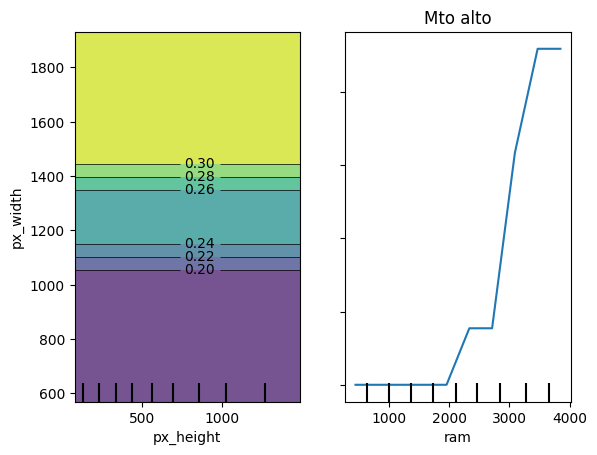


DecisionTreeClassifier 2:


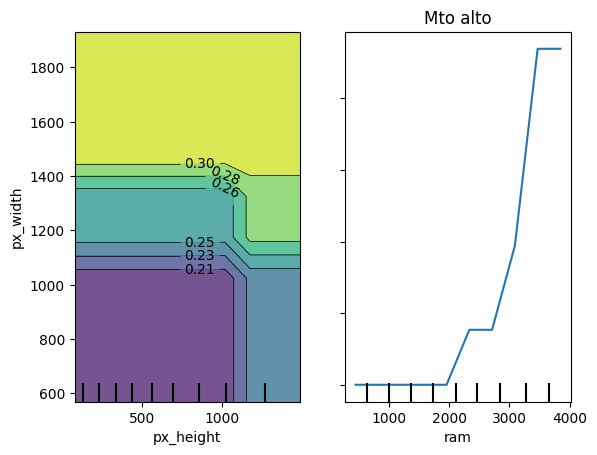


DecisionTreeClassifier 3:


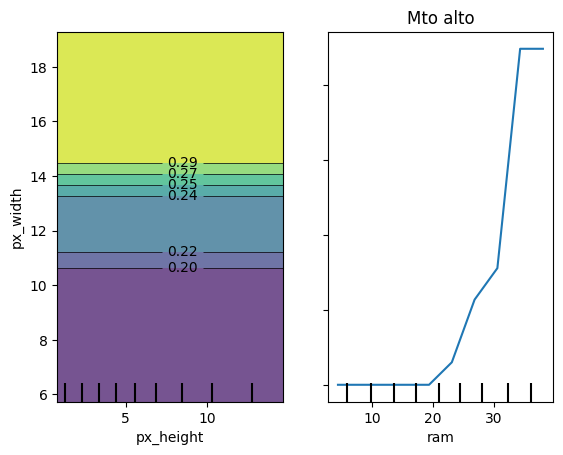


DecisionTreeClassifier 4:


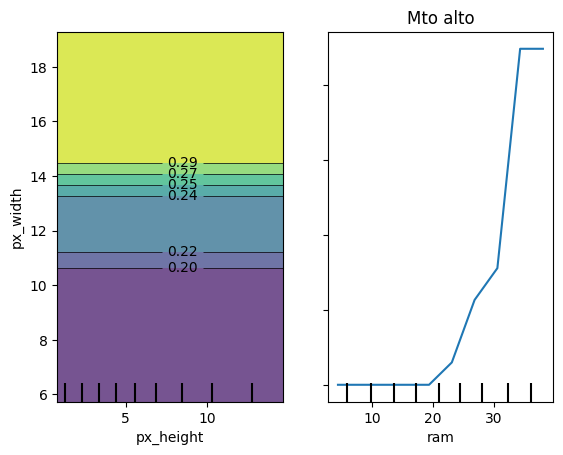


------------------------------------------------------------
------------------------------------------------------------


In [523]:
pdp2versions((dtree, bigdtree, dtree2, bigdtree2), (X_train, X_train, X_train2, X_train2), [(11, 12), 13], res=10)

---
### rforest

In [529]:
rforests = (rforest, rforest2)

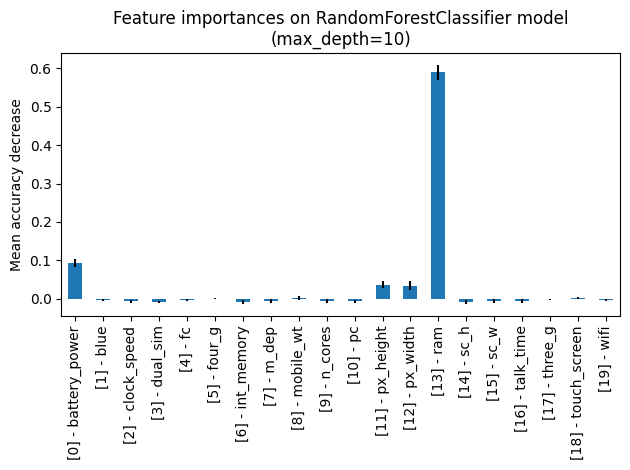

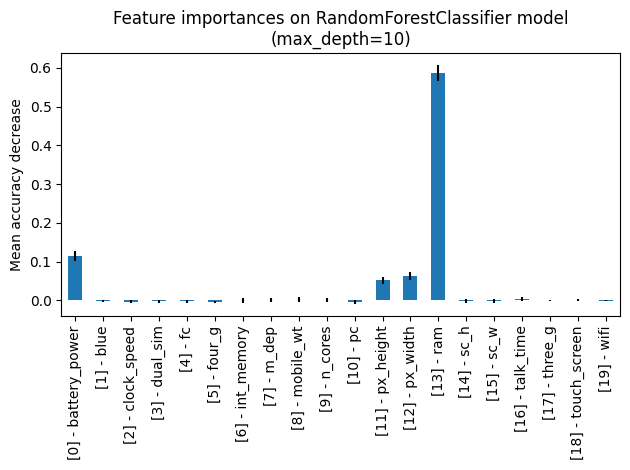

In [518]:
pfi(rforest, X_test, y_test)
pfi(rforest2, X_test2, y_test2)


RandomForestClassifier 1:


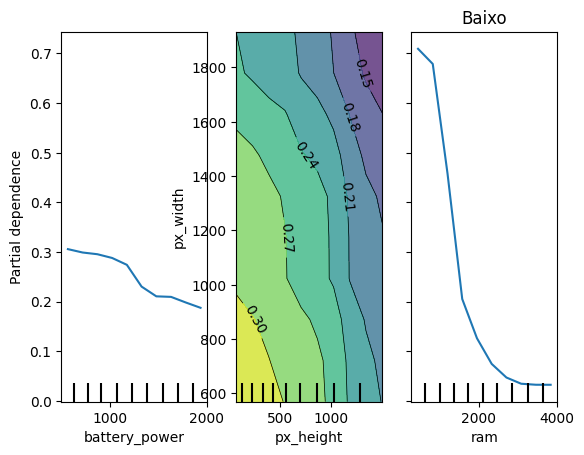


RandomForestClassifier 2:


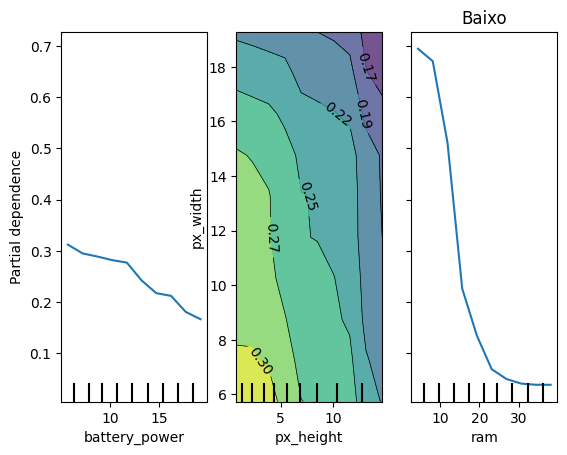


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


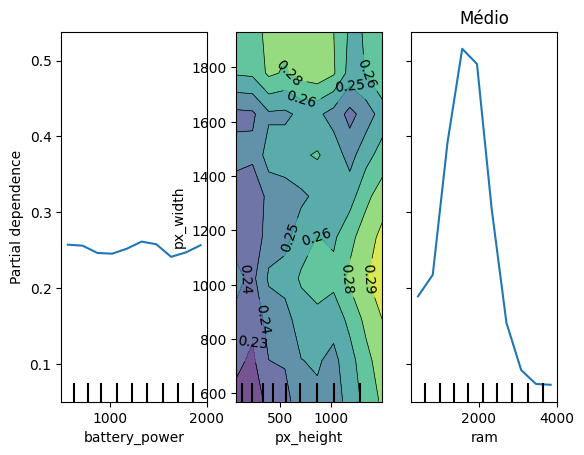


RandomForestClassifier 2:


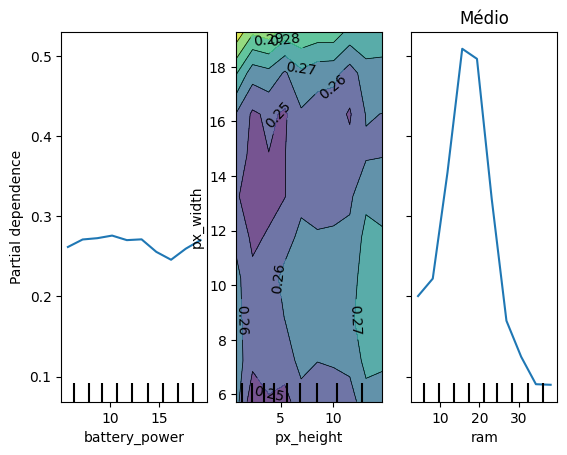


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


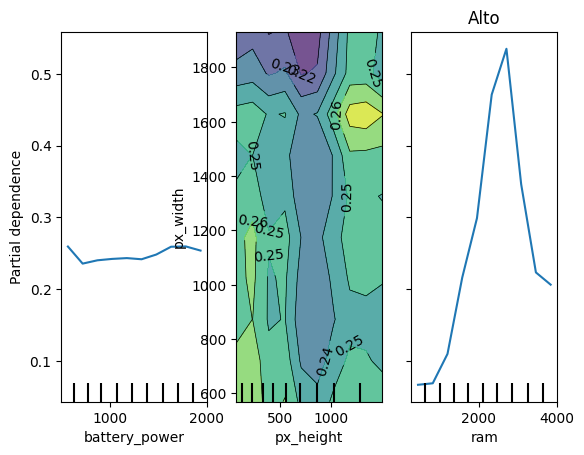


RandomForestClassifier 2:


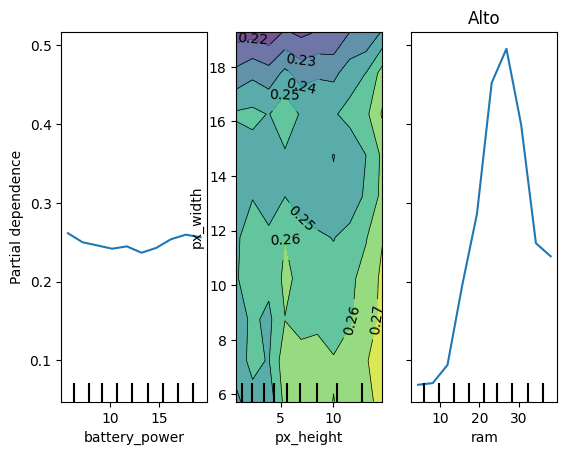


------------------------------------------------------------
------------------------------------------------------------

RandomForestClassifier 1:


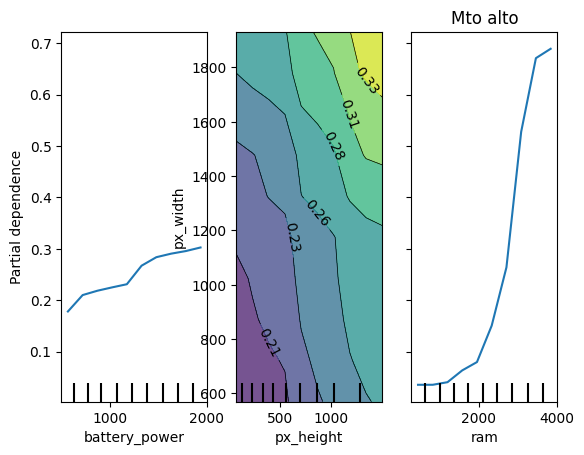


RandomForestClassifier 2:


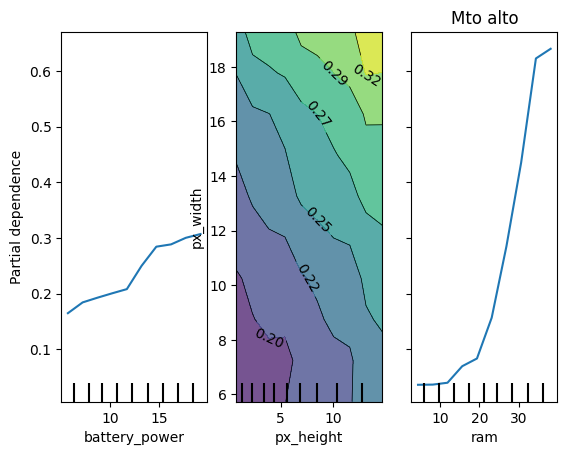


------------------------------------------------------------
------------------------------------------------------------


In [530]:
pdp2versions(rforests, xtrains, [0, (11, 12), 13])

---
### knn

In [525]:
knns = (knn, knn2)

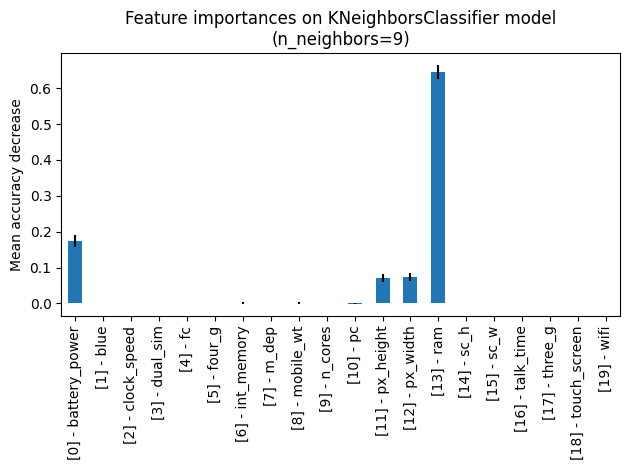

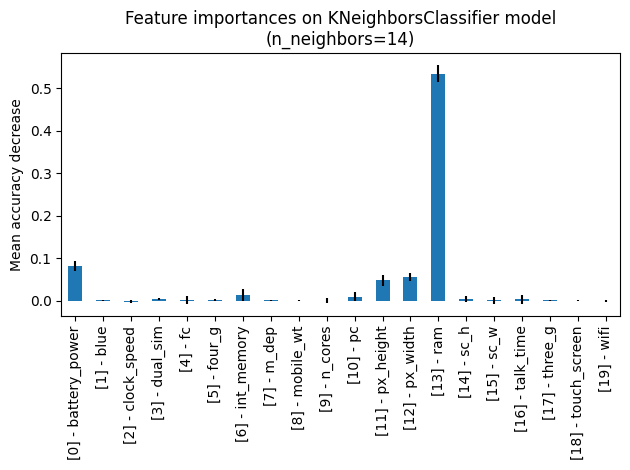

In [527]:
pfi(knn, X_test, y_test)
pfi(knn2, X_test2, y_test2)


KNeighborsClassifier 1:


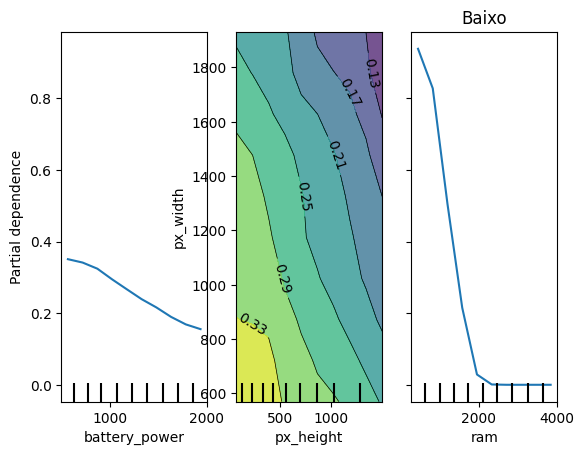


KNeighborsClassifier 2:


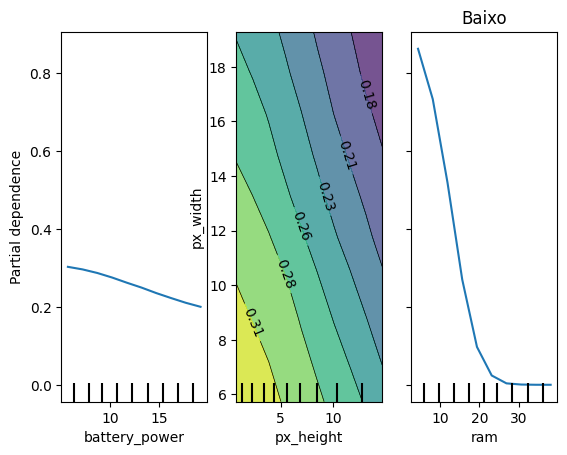


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


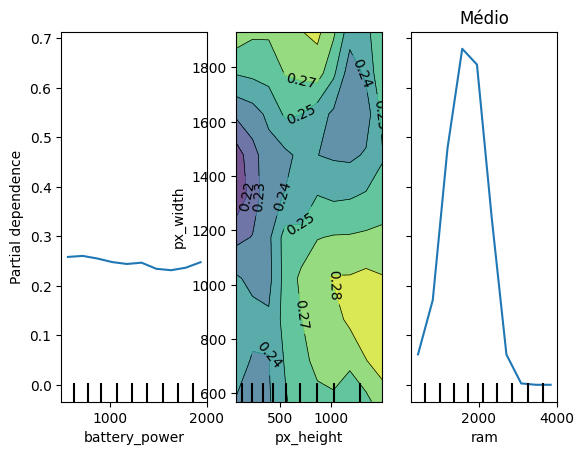


KNeighborsClassifier 2:


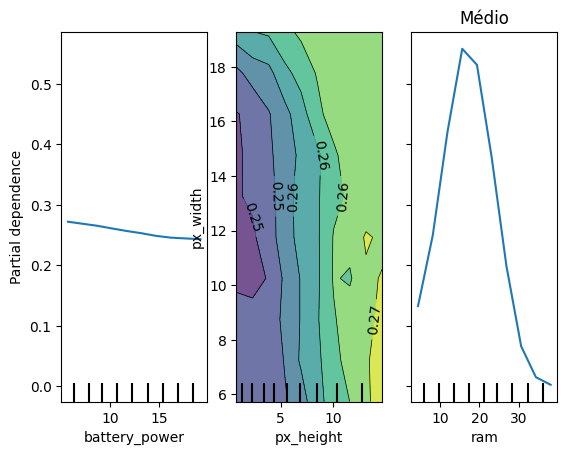


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


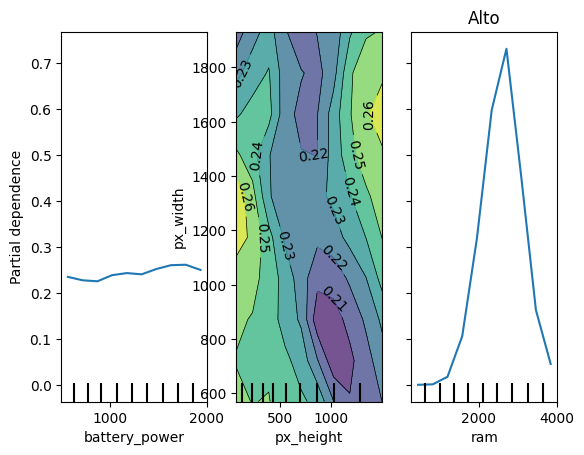


KNeighborsClassifier 2:


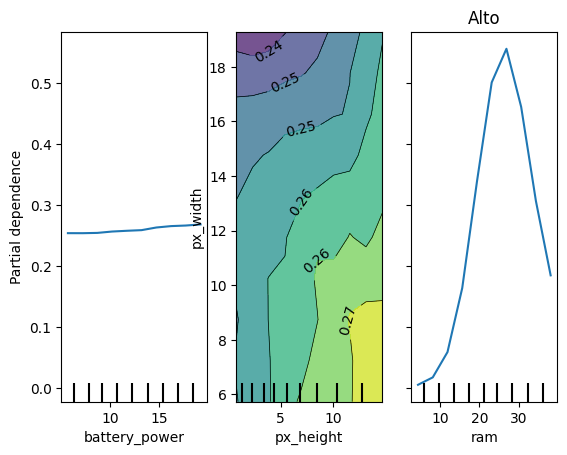


------------------------------------------------------------
------------------------------------------------------------

KNeighborsClassifier 1:


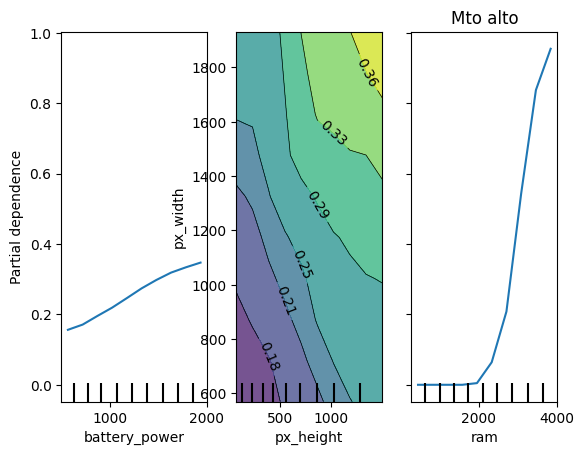


KNeighborsClassifier 2:


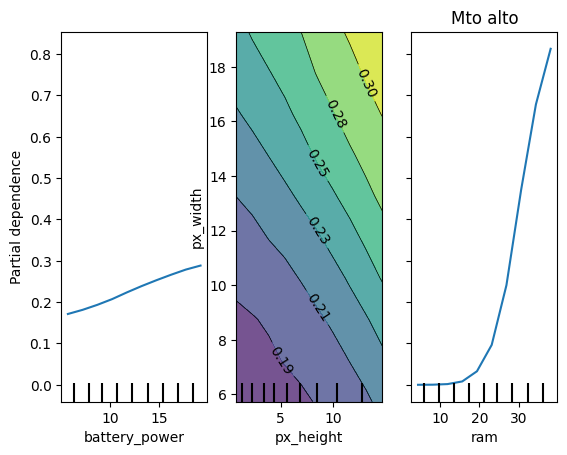


------------------------------------------------------------
------------------------------------------------------------


In [528]:
pdp2versions(knns, xtrains, [0, (11, 12), 13])

---
###mlp

In [504]:
mlps = (mlp, mlp2)

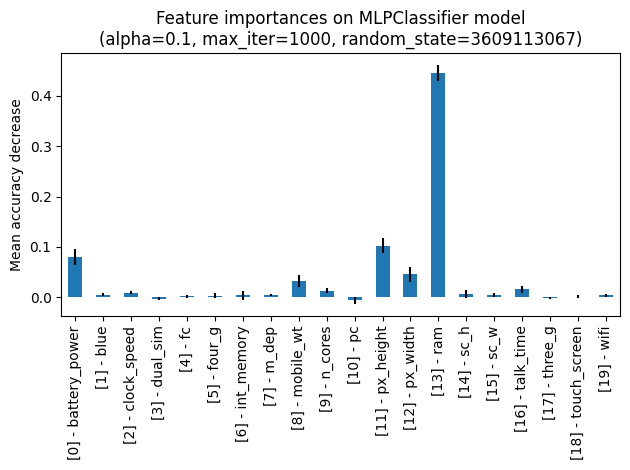

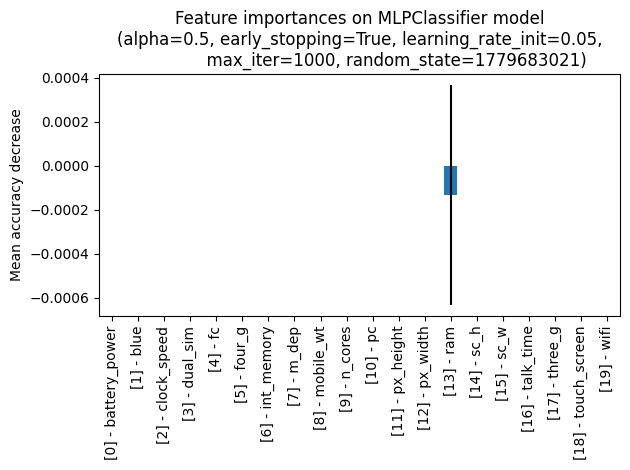

In [515]:
pfi(mlp, X_test, y_test)
pfi(mlp2, X_test, y_test)


MLPClassifier 1:


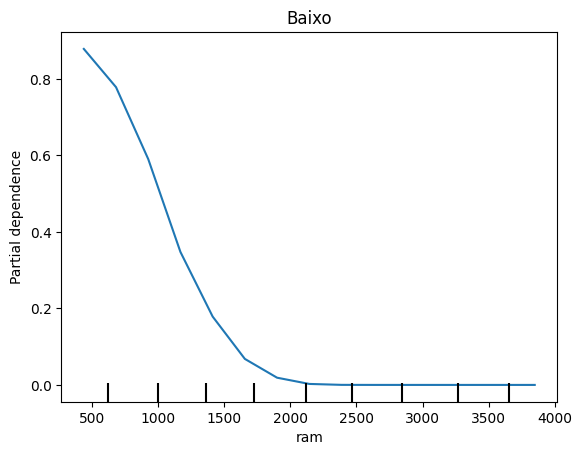


MLPClassifier 2:


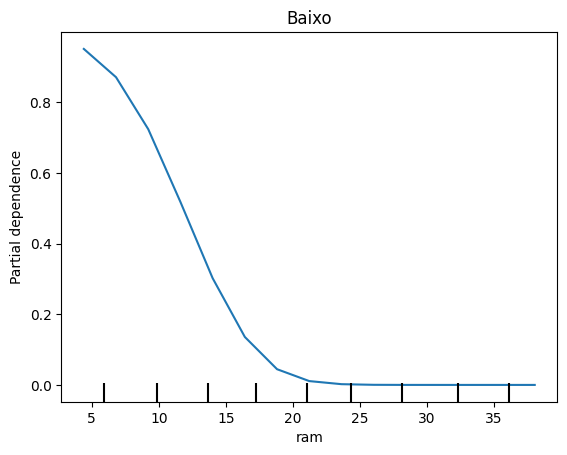


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


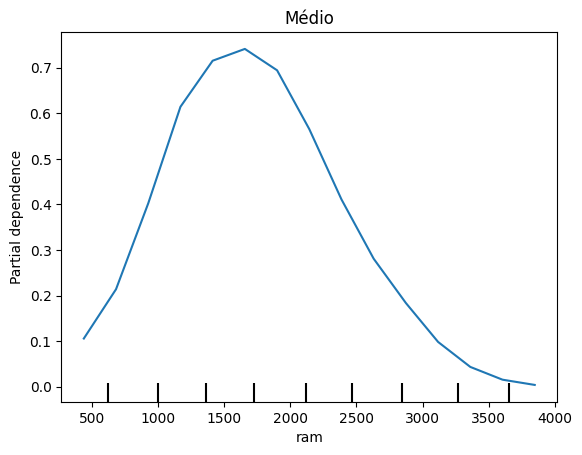


MLPClassifier 2:


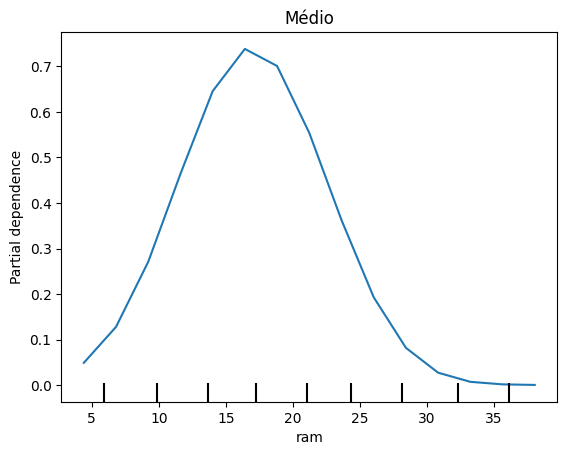


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


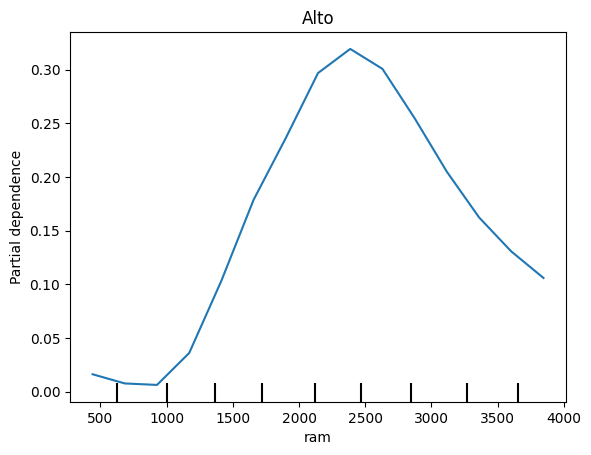


MLPClassifier 2:


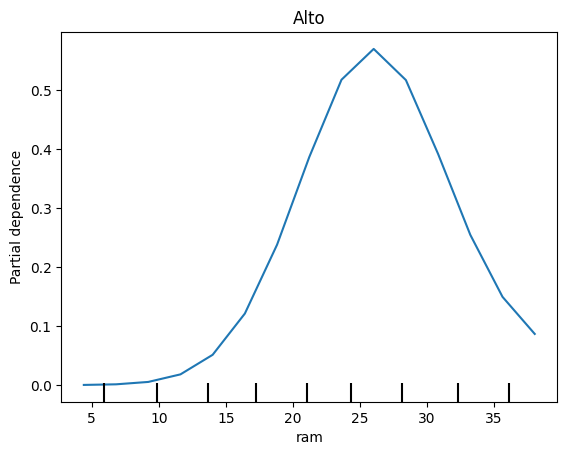


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


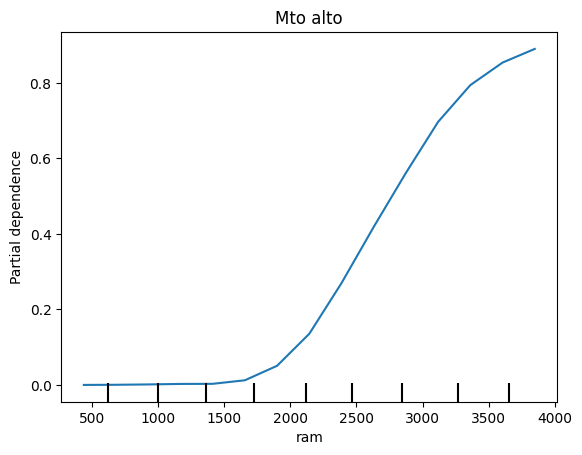


MLPClassifier 2:


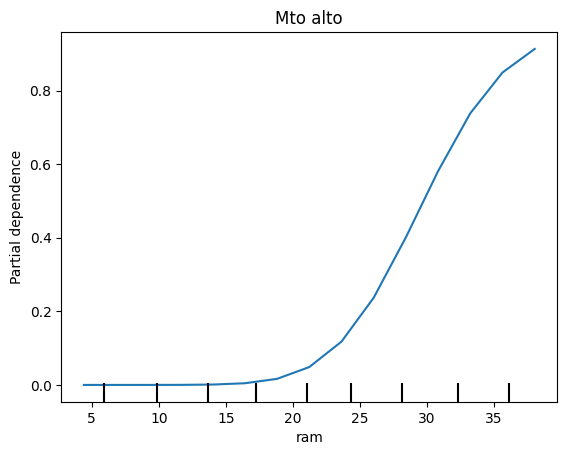


------------------------------------------------------------
------------------------------------------------------------


In [506]:
#pdp.from_estimator(mlp, X_train, [4, 5, 7])
pdp2versions(mlps, xtrains, [13], res=15, axis=0)


MLPClassifier 1:


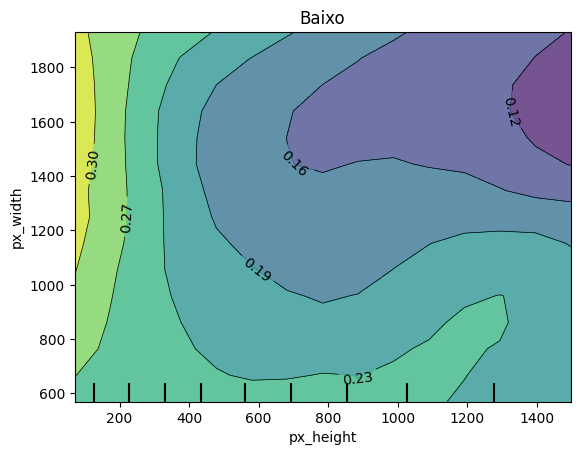

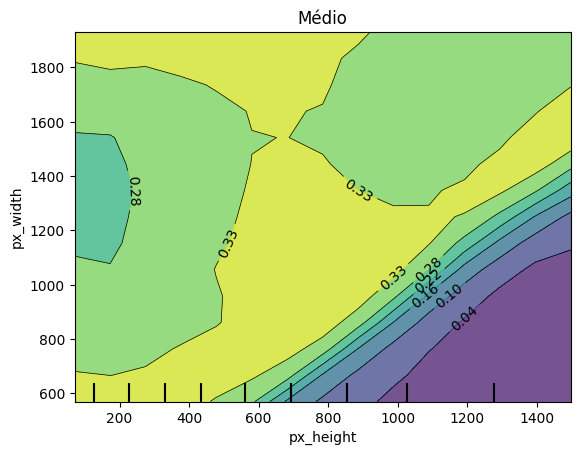

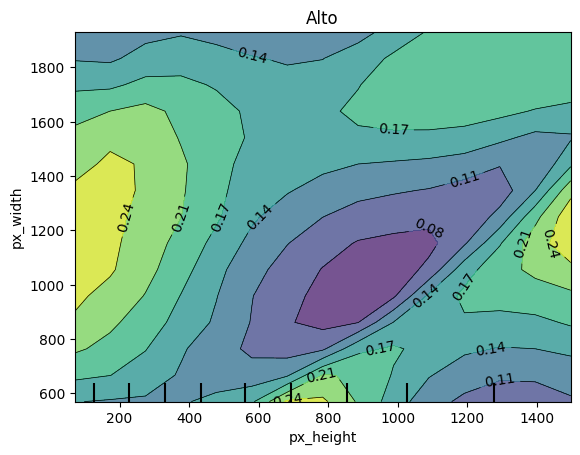

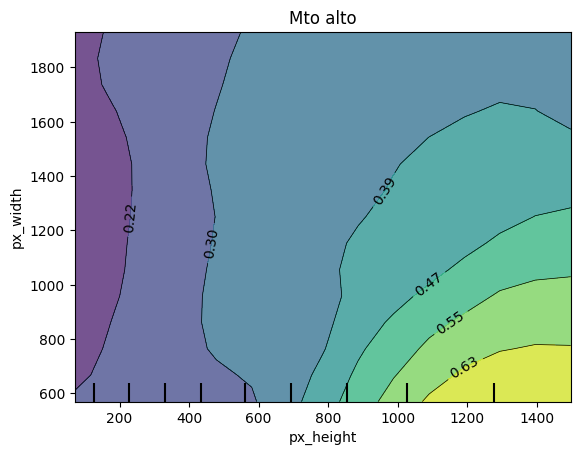


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 2:


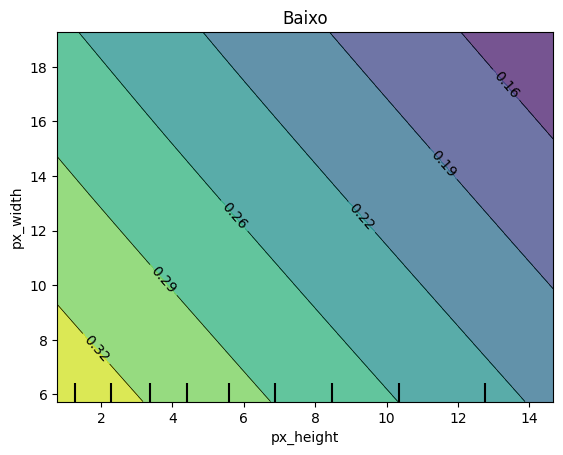

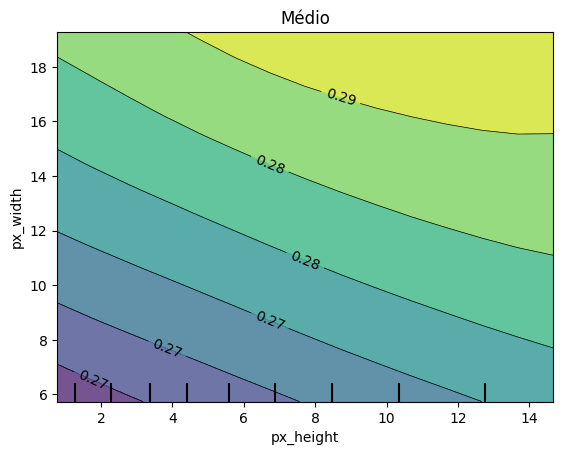

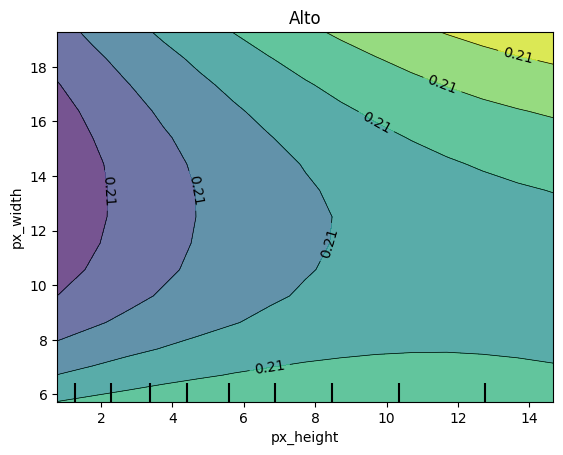

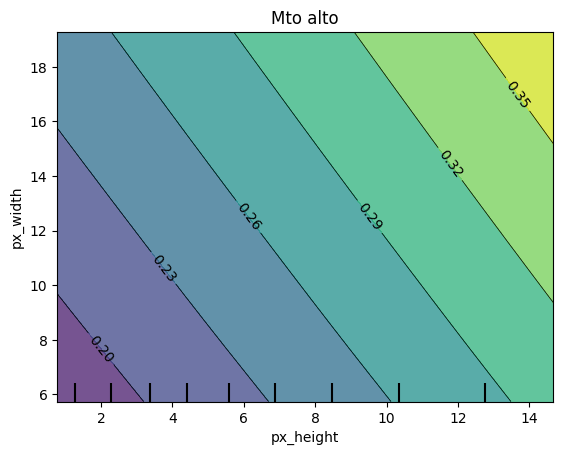


------------------------------------------------------------
------------------------------------------------------------


In [507]:
pdp2versions(mlps, xtrains, [(11, 12)], res=15, axis=1)


MLPClassifier 1:


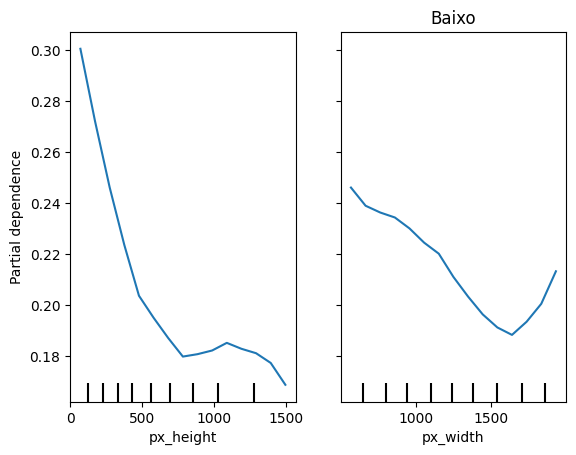


MLPClassifier 2:


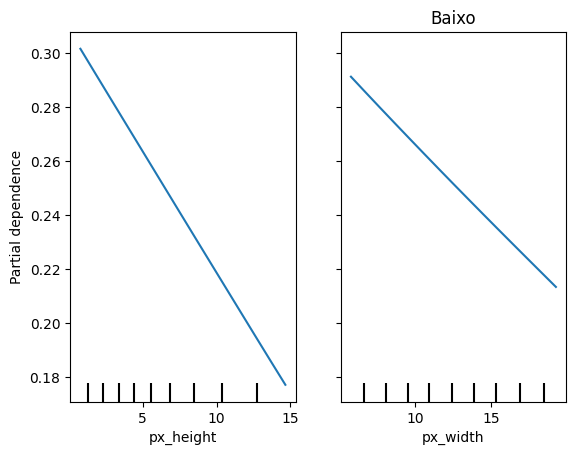


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


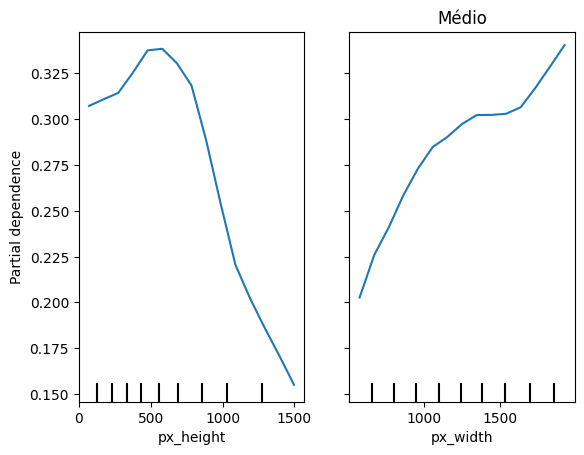


MLPClassifier 2:


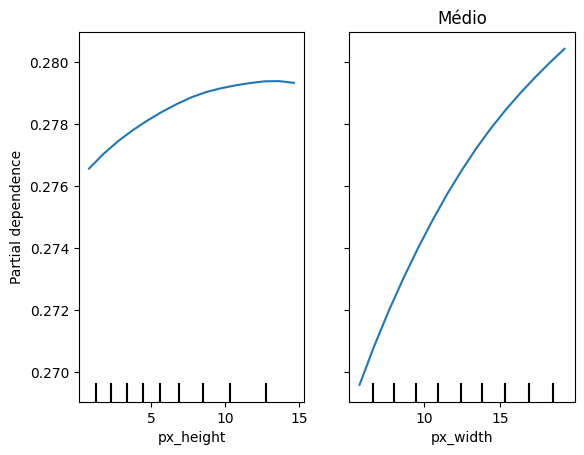


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


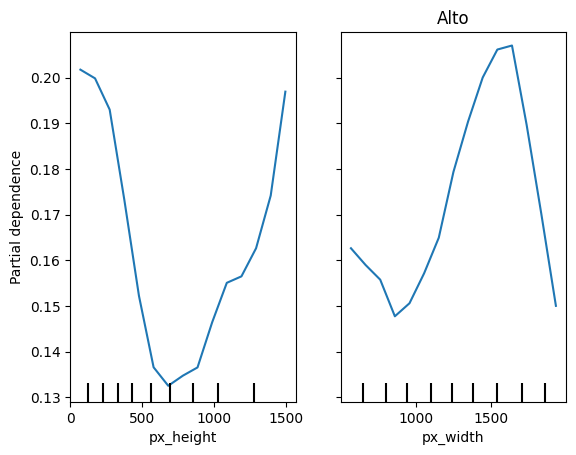


MLPClassifier 2:


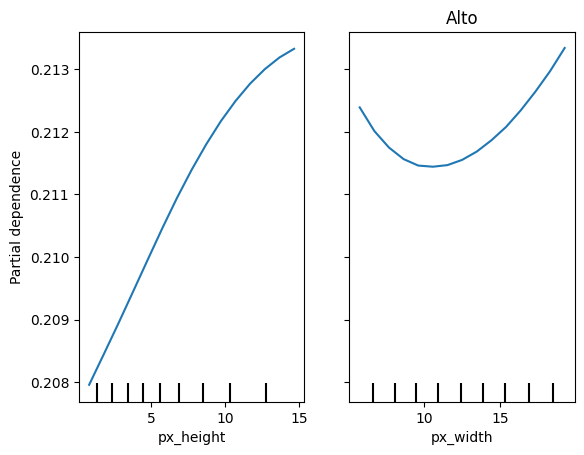


------------------------------------------------------------
------------------------------------------------------------

MLPClassifier 1:


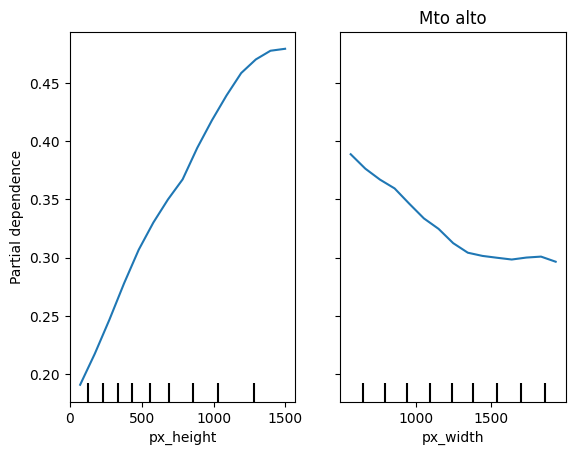


MLPClassifier 2:


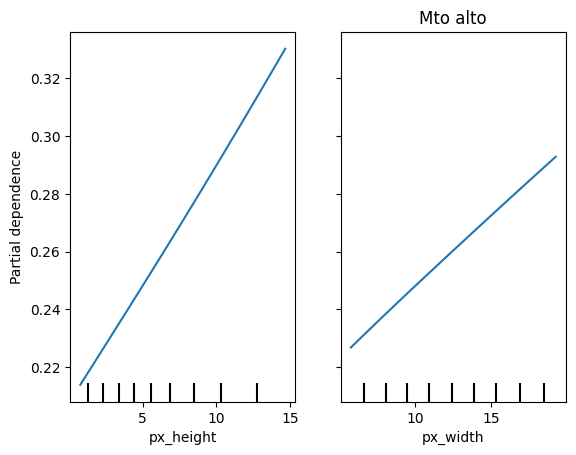


------------------------------------------------------------
------------------------------------------------------------


In [524]:
pdp2versions(mlps, xtrains, [11, 12], res=15)

---


DecisionTreeClassifier 1:


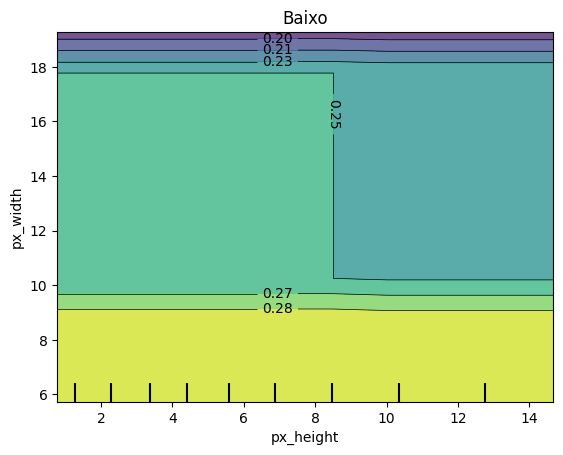


RandomForestClassifier 2:


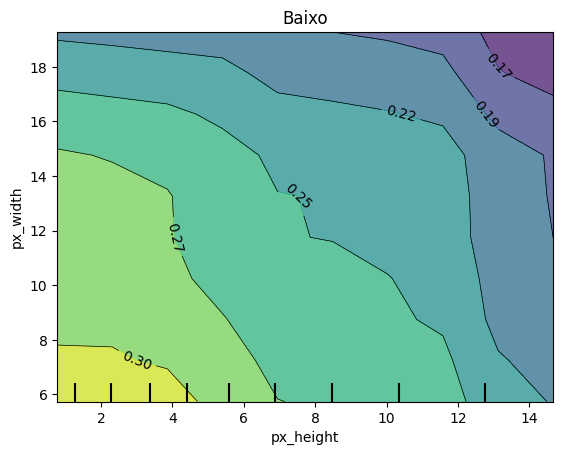


KNeighborsClassifier 3:


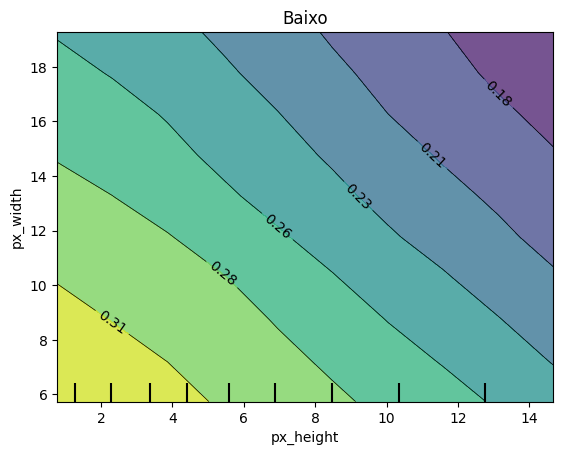


MLPClassifier 4:


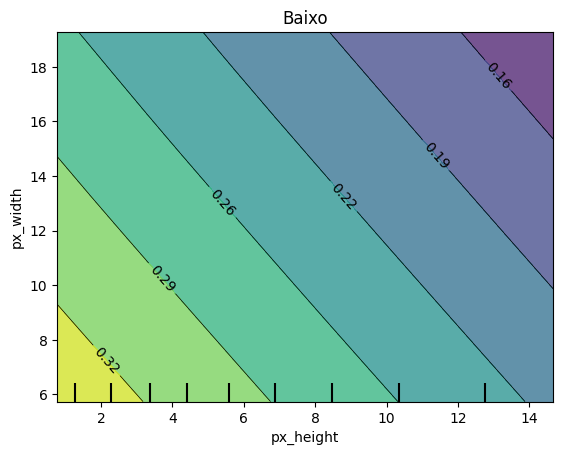


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


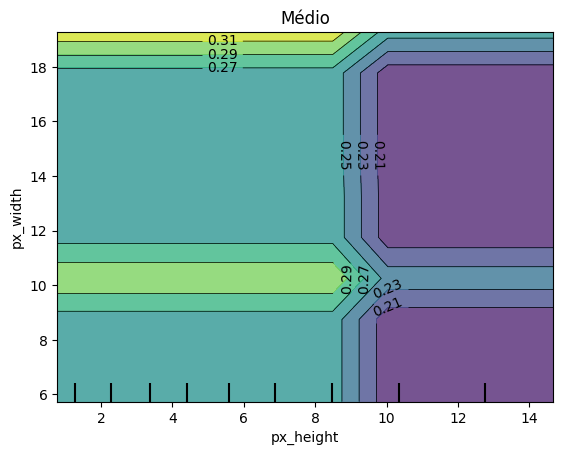


RandomForestClassifier 2:


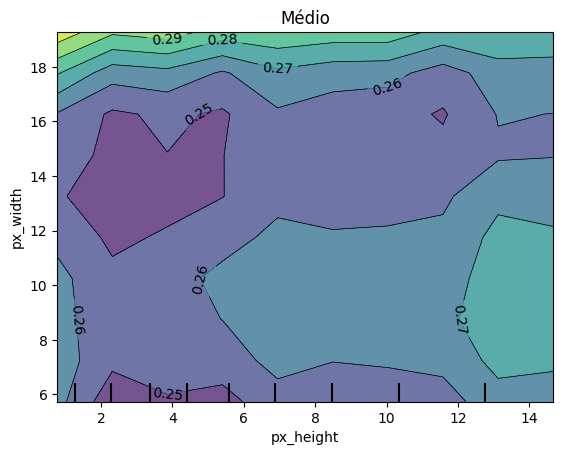


KNeighborsClassifier 3:


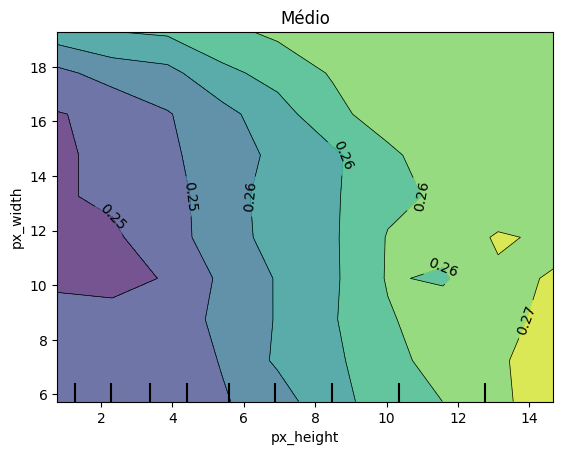


MLPClassifier 4:


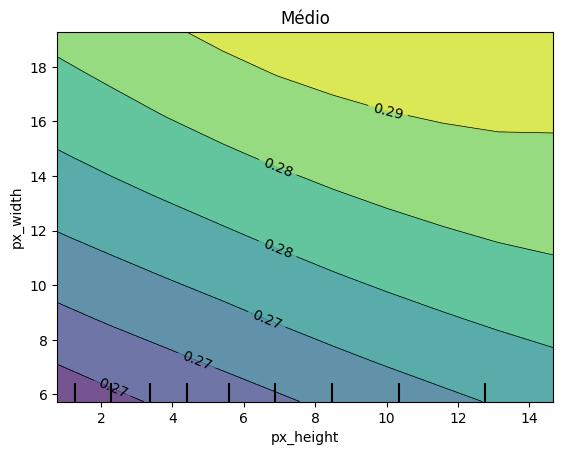


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


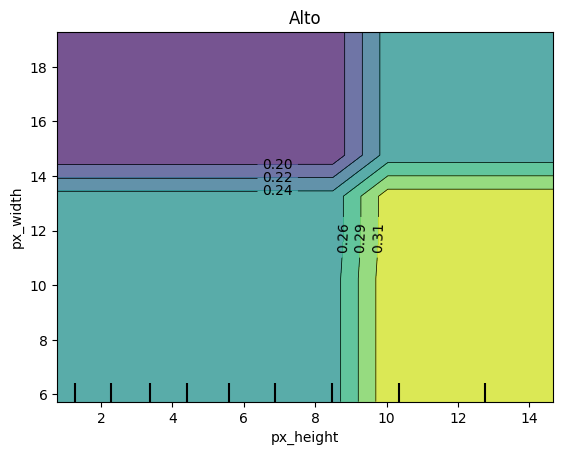


RandomForestClassifier 2:


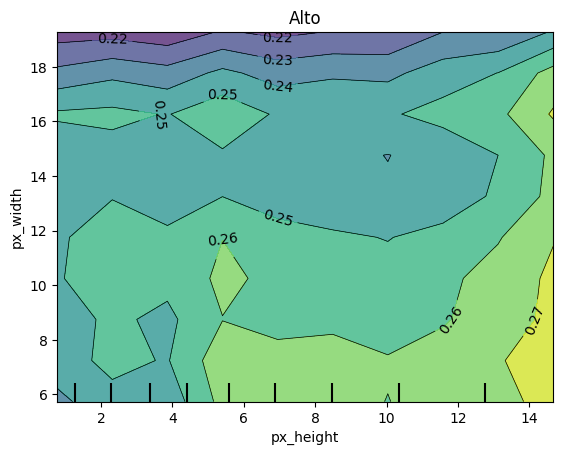


KNeighborsClassifier 3:


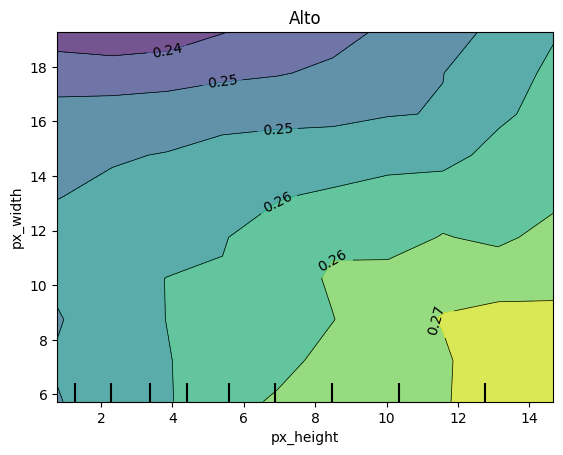


MLPClassifier 4:


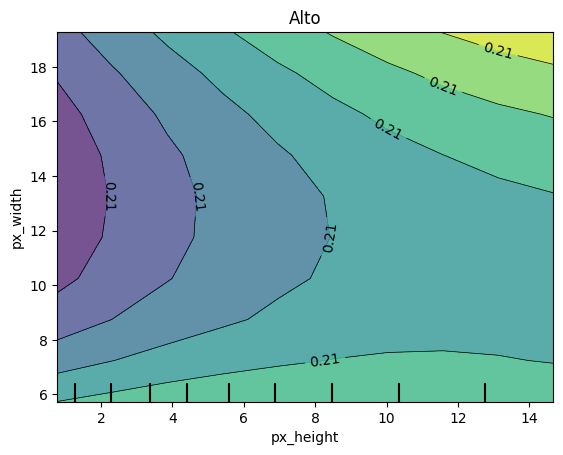


------------------------------------------------------------
------------------------------------------------------------

DecisionTreeClassifier 1:


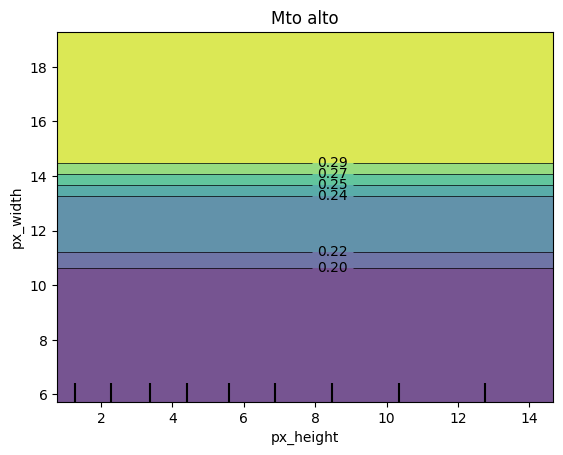


RandomForestClassifier 2:


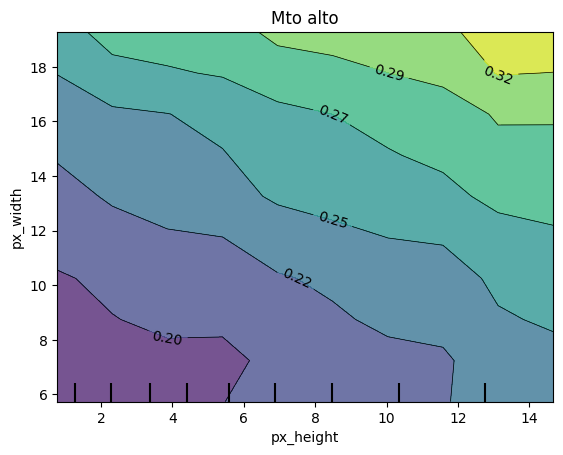


KNeighborsClassifier 3:


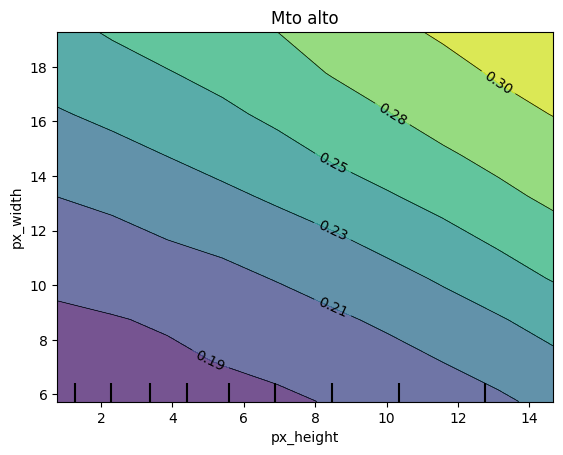


MLPClassifier 4:


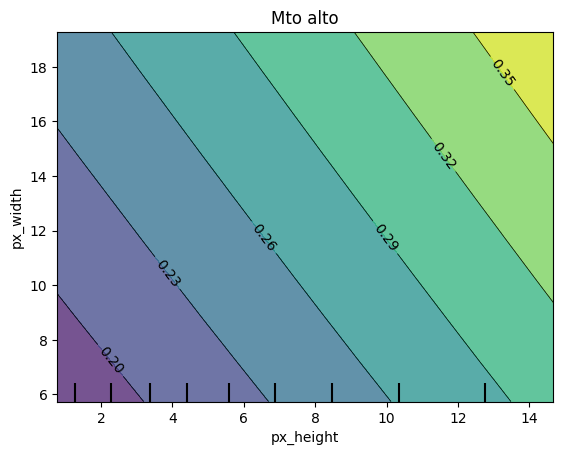


------------------------------------------------------------
------------------------------------------------------------


In [522]:
pdp2versions((dtree2, rforest2, knn2, mlp2), [X_train2]*4, [(11, 12)])

# **Análise e Conclusão**